### Load Required Packages and Data

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import scipy.special
import ghalton
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [4]:
from utils import clean,to_radian,hann,res_to_rad,ax_to_w,rep_to_angle
from Bessel_Interp import generate_halton_points
from rotation_2d import rot_cost_func, imrotate
from visualize import plot_cost_func, plot_cost_func_t,plot_volume
from cost_functions import cf_ssd
from mask import sphere_mask

In [5]:
axes_dict = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/for_cluster/axes_dict.p','rb'))
rot_axes = ['xz', 'y', 'yz', 'xy', 'x', 'z']
ax_to_idx = {}
for rot_ax in rot_axes:
    ax_to_idx[rot_ax] = rot_axes.index(rot_ax)
    
rot_axes_tricubic = ['x', 'y', 'z', 'xy', 'yz', 'xz']
ax_to_idx_tricubic = {}
for rot_ax in rot_axes_tricubic:
    ax_to_idx_tricubic[rot_ax] = rot_axes_tricubic.index(rot_ax)%3
print ax_to_idx_tricubic

{'xy': 0, 'xz': 2, 'yz': 1, 'y': 1, 'x': 0, 'z': 2}


# Rotations

In [12]:
from sept23_visualize import preprocess, load_pickle,split_plot,scatter_plot_cubic, scatter_plot, scatter_plot_all_linear, error_in_time,error_plot

Comparason between cubic and linear interpolation. (No mask, registration center not shifted)

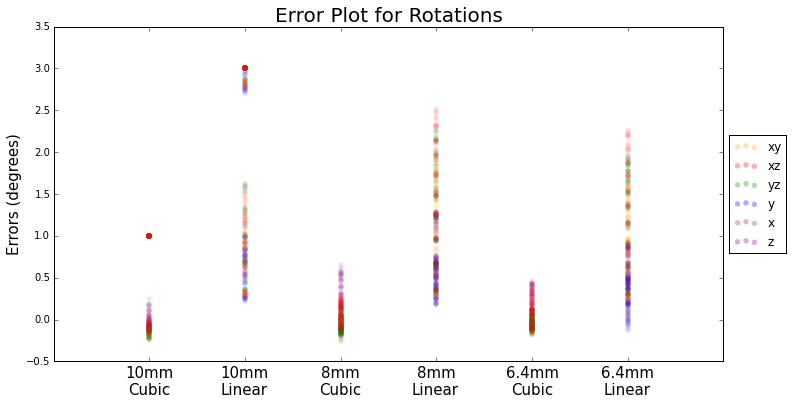

In [25]:
error_plot_rotations([12,6])

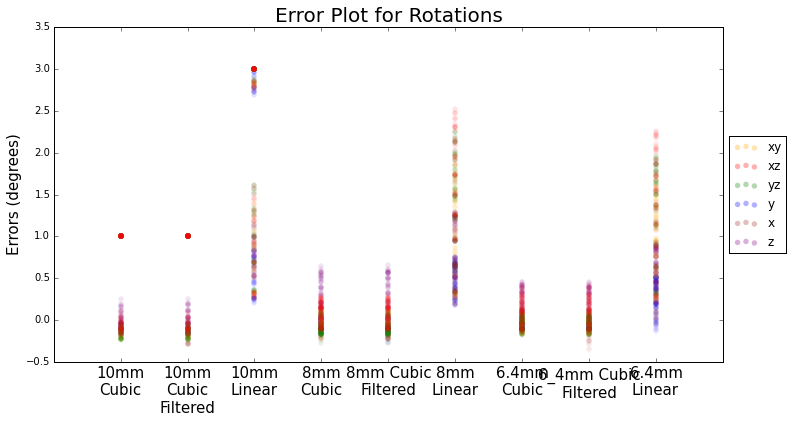

In [29]:
error_plot_rotations_all([12,6])

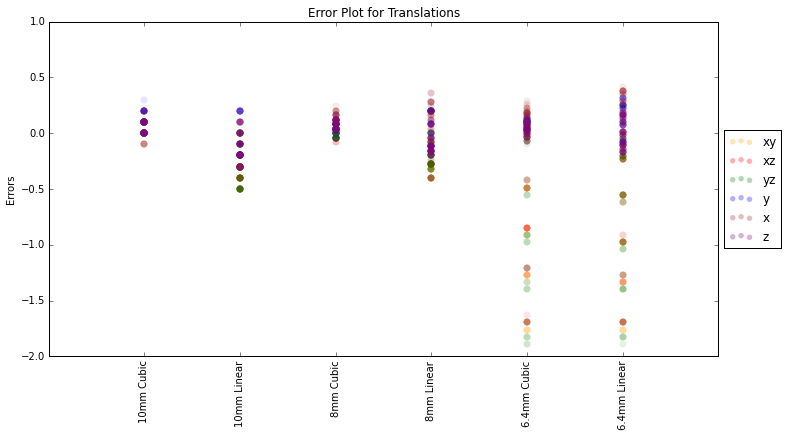

In [77]:
error_plot_translations([12,6])

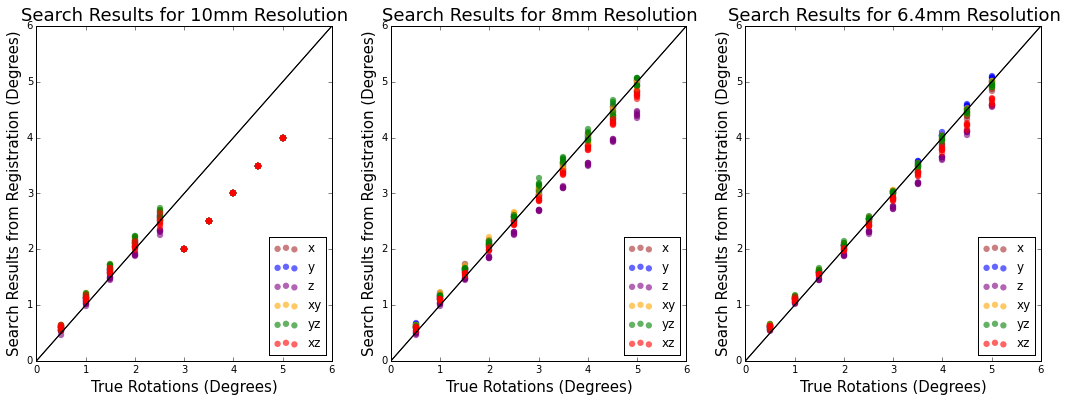

In [31]:
# # Tricubic Interpolation Results all together
cost_dict_10 = load_pickle('10','xyz')
cost_dict_10_1 = load_pickle('10','xyyzxz')

cost_dict_8 = load_pickle('8','xyz')
cost_dict_8_1 = load_pickle('8','xyyzxz')

cost_dict_6_4 = load_pickle('6_4','xyz')
cost_dict_6_4_1 = load_pickle('6_4','xyyzxz')

plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot_cubic(cost_dict_10, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_10_1, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
plt.subplot(1,3,2)
scatter_plot_cubic(cost_dict_8, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_8_1, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.subplot(1,3,3)
scatter_plot_cubic(cost_dict_6_4, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_6_4_1, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.show()

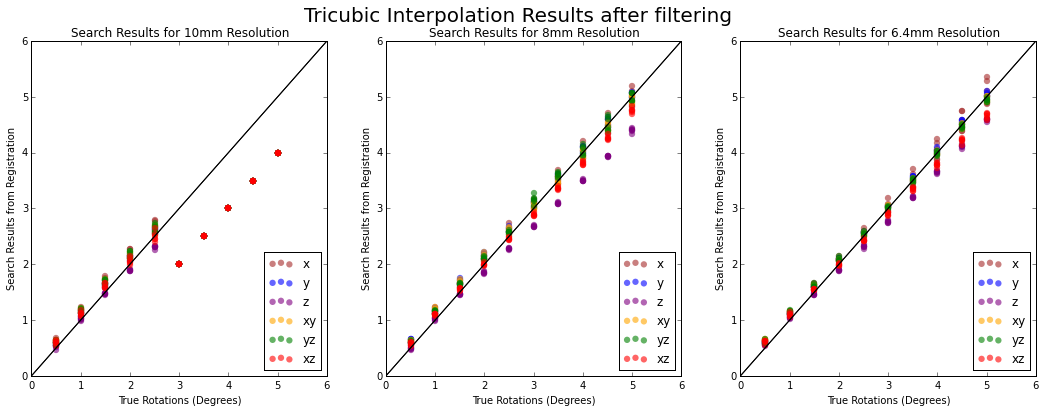

In [14]:
# # Tricubic Interpolation Results after filtering all together
cost_dict_10_filtered = load_pickle('filtered_10','xyz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')
cost_dict_10_1_filtered = load_pickle('filtered_10','xyyzxz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')

cost_dict_8_filtered = load_pickle('filtered_8','xyz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')
cost_dict_8_1_filtered = load_pickle('filtered_8','xyyzxz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')

cost_dict_6_4_filtered = load_pickle('filtered_6_4','xyz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')
cost_dict_6_4_1_filtered = load_pickle('filtered_6_4','xyyzxz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')

plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot_cubic(cost_dict_10_filtered, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_10_1_filtered, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
plt.subplot(1,3,2)
scatter_plot_cubic(cost_dict_8_filtered, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_8_1_filtered, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.subplot(1,3,3)
scatter_plot_cubic(cost_dict_6_4_filtered, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_6_4_1_filtered, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.suptitle('Tricubic Interpolation Results after filtering',fontsize=20)
plt.show()

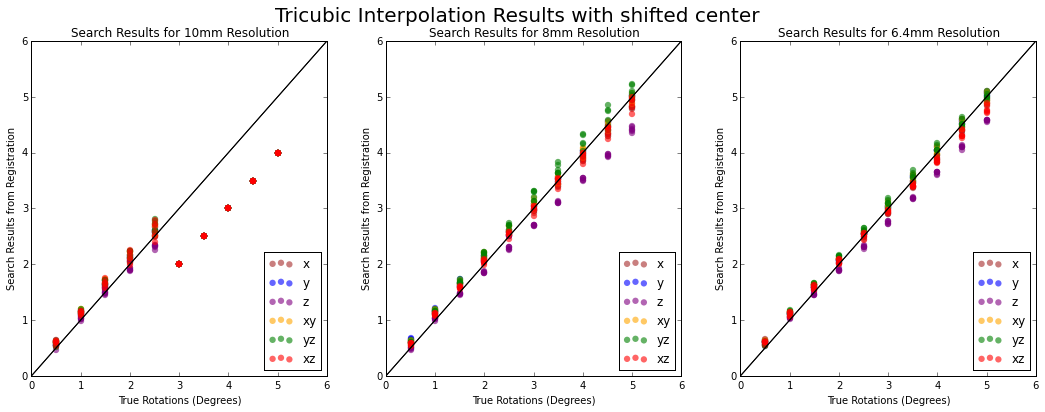

In [15]:
# # Tricubic Interpolation Results with shifted center all together
cost_dict_10_shifted = load_pickle('10','xyz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')
cost_dict_10_1_shifted = load_pickle('10','xyyzxz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')

cost_dict_8_shifted = load_pickle('8','xyz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')
cost_dict_8_1_shifted = load_pickle('8','xyyzxz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')

cost_dict_6_4_shifted = load_pickle('6_4','xyz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')
cost_dict_6_4_1_shifted = load_pickle('6_4','xyyzxz','/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/')

plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot_cubic(cost_dict_10_shifted, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_10_1_shifted, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
plt.subplot(1,3,2)
scatter_plot_cubic(cost_dict_8_shifted, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_8_1_shifted, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.subplot(1,3,3)
scatter_plot_cubic(cost_dict_6_4_shifted, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_6_4_1_shifted, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.suptitle('Tricubic Interpolation Results with shifted center',fontsize=20)
plt.show()

In [ ]:
# # Tricubic Interpolation Results with shifted center all together
cost_dict_10_shifted = load_pickle('10','xyz','/Users/zyzdiana/Desktop/')
cost_dict_10_1_shifted = load_pickle('10','xyyzxz','/Users/zyzdiana/Desktop/')

cost_dict_8_shifted = load_pickle('8','xyz','/Users/zyzdiana/Desktop/')
cost_dict_8_1_shifted = load_pickle('8','xyyzxz','/Users/zyzdiana/Desktop/')

cost_dict_6_4_shifted = load_pickle('6_4','xyz','/Users/zyzdiana/Desktop/')
cost_dict_6_4_1_shifted = load_pickle('6_4','xyyzxz','/Users/zyzdiana/Desktop/')

plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot_cubic(cost_dict_10_shifted, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_10_1_shifted, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
plt.subplot(1,3,2)
scatter_plot_cubic(cost_dict_8_shifted, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_8_1_shifted, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.subplot(1,3,3)
scatter_plot_cubic(cost_dict_6_4_shifted, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_6_4_1_shifted, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.suptitle('Tricubic Interpolation Results with shifted center',fontsize=20)
plt.show()

### Show interpolation results one rotation axis per plot

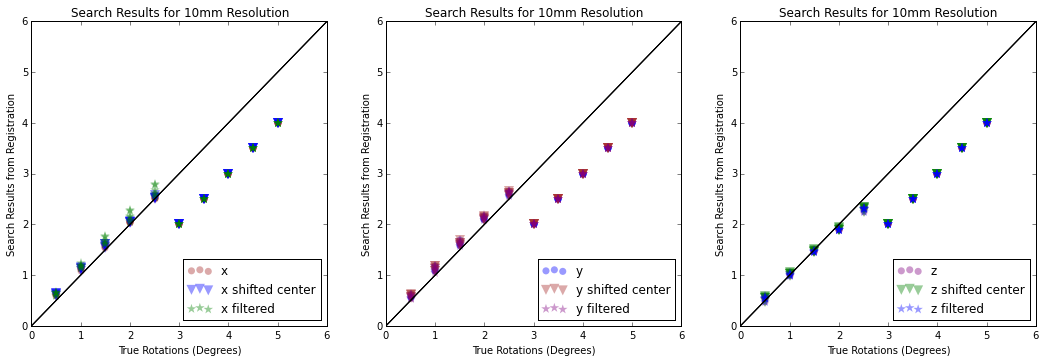

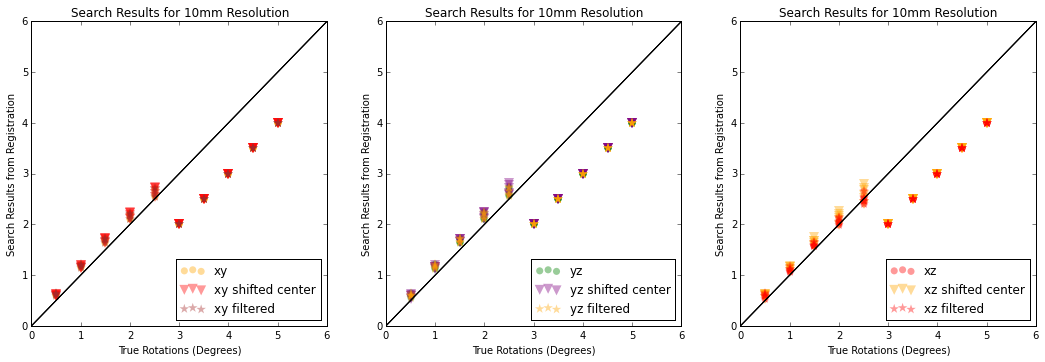

In [53]:
split_plot(cost_dict_10,cost_dict_10_1,
           cost_dict_10_shifted,cost_dict_10_1_shifted,
           cost_dict_10_filtered,cost_dict_10_1_filtered,
           '10mm',ax_to_idx_tricubic)

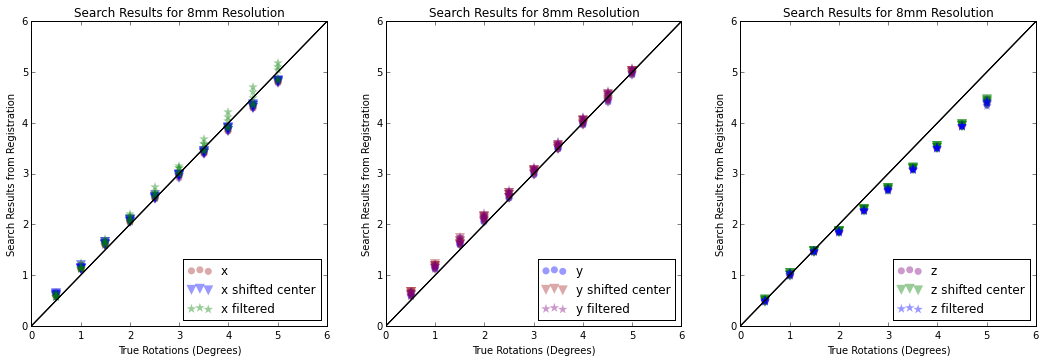

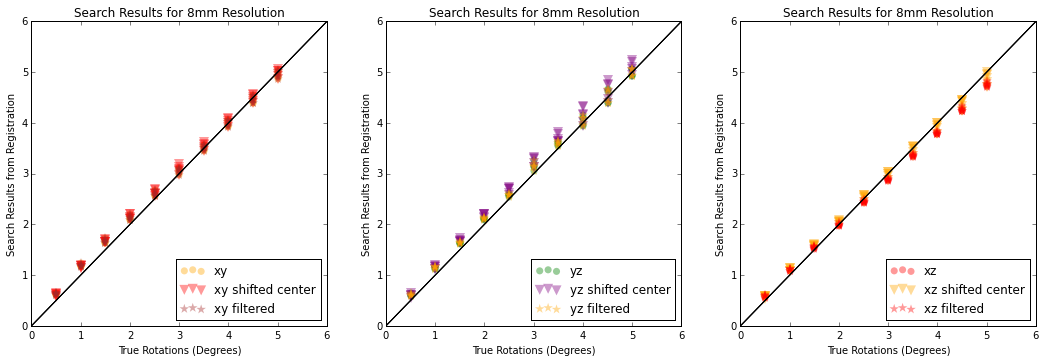

In [54]:
split_plot(cost_dict_8,cost_dict_8_1,
           cost_dict_8_shifted,cost_dict_8_1_shifted,
           cost_dict_8_filtered,cost_dict_8_1_filtered,
           '8mm',ax_to_idx_tricubic)

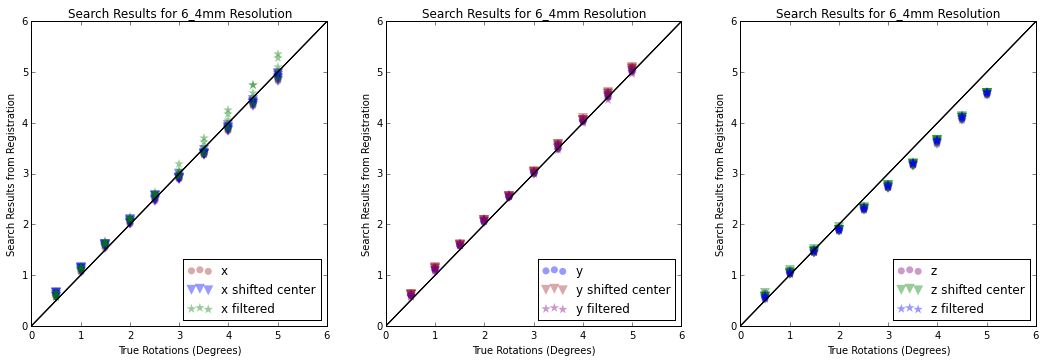

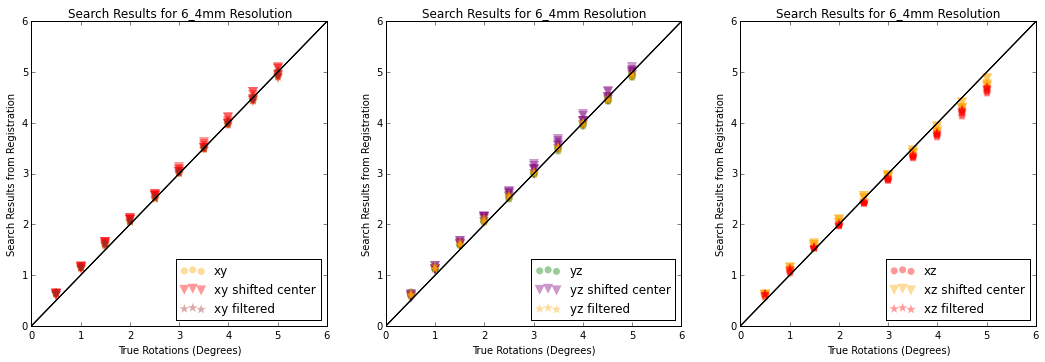

In [55]:
split_plot(cost_dict_6_4,cost_dict_6_4_1,
           cost_dict_6_4_shifted,cost_dict_6_4_1_shifted,
           cost_dict_6_4_filtered,cost_dict_6_4_1_filtered,
           '6_4mm',ax_to_idx_tricubic)

### Error Plots
Now for the error plot, I'm plotting true_degree-search results, without taking the absolute value of that, and I'm also drawing a threshold of [-0.05,0.05] on all plots as a reference.

In [23]:
def error_plot_rotations(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = [1,2,3,4,5,6]
    labels = ['10mm\nCubic','10mm\nLinear','8mm\nCubic','8mm\nLinear','6.4mm\nCubic','6.4mm\nLinear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    error_plot(cost_dict_10,1,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    error_plot(cost_dict_10_1,1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    error_plot(cost_dict_10_linear,2,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    error_plot(cost_dict_8,3,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    error_plot(cost_dict_8_1,3,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    error_plot(cost_dict_8_linear,4,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    error_plot(cost_dict_6_4,5,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    error_plot(cost_dict_6_4_1,5,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    error_plot(cost_dict_6_4_linear,6,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [28]:
def error_plot_rotations_all(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = np.arange(1,10)
    labels = ['10mm\nCubic','10mm\nCubic\nFiltered','10mm\nLinear',
              '8mm\nCubic','8mm Cubic\nFiltered','8mm\nLinear',
              '6.4mm\nCubic','6_4mm Cubic\nFiltered','6.4mm\nLinear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    error_plot(cost_dict_10,1,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_10_1,1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    #error_plot(cost_dict_10_shifted,2,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    #error_plot(cost_dict_10_1_shifted,2,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_10_filtered,2,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_10_1_filtered,2,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_10_linear,3,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3,xlim=[0,14])
    
    error_plot(cost_dict_8,4,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_8_1,4,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    #error_plot(cost_dict_8_shifted,6,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    #error_plot(cost_dict_8_1_shifted,6,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_8_filtered,5,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_8_1_filtered,5,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_8_linear,6,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3,xlim=[0,14])
    
    error_plot(cost_dict_6_4,7,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_6_4_1,7,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    #error_plot(cost_dict_6_4_shifted,10,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    #error_plot(cost_dict_6_4_1_shifted,10,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_6_4_filtered,8,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_6_4_1_filtered,8,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic,xlim=[0,14])
    error_plot(cost_dict_6_4_linear,9,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3,xlim=[0,14])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim([0,10])
    plt.show()

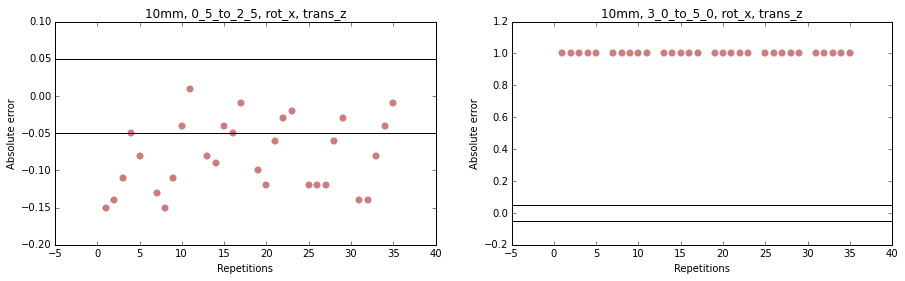

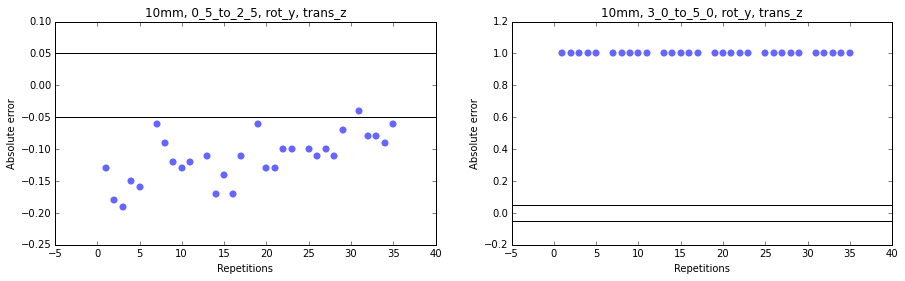

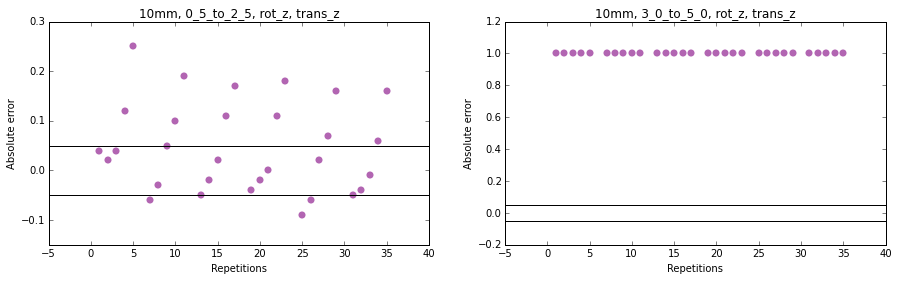

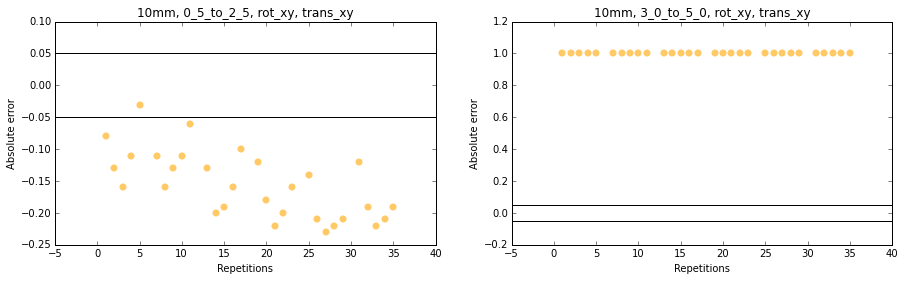

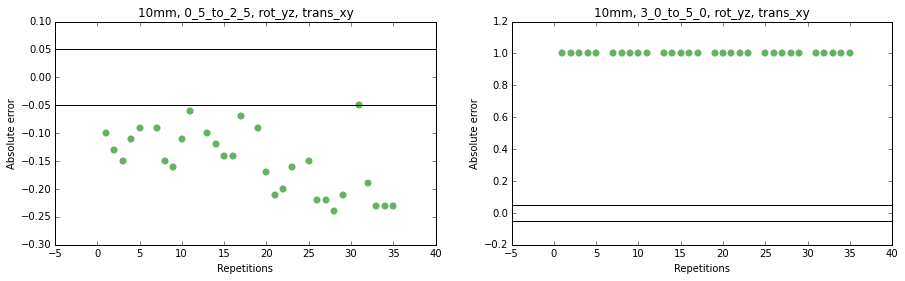

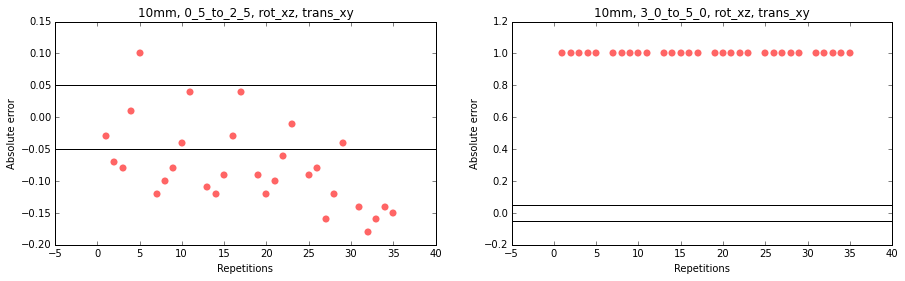

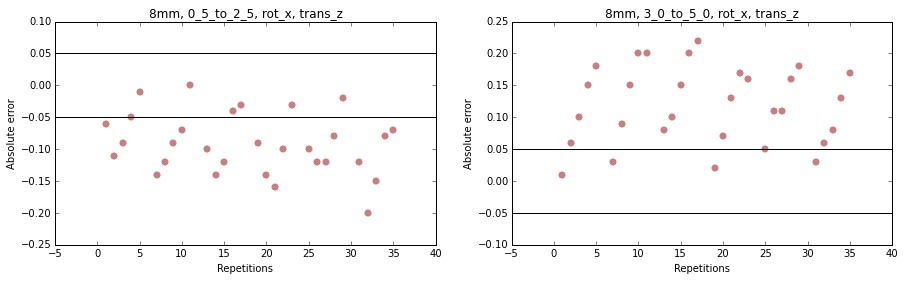

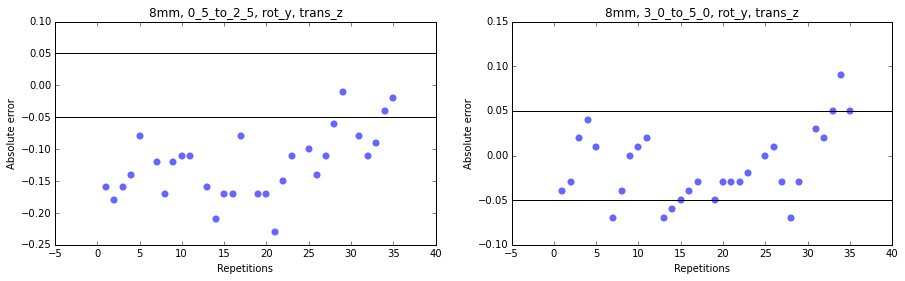

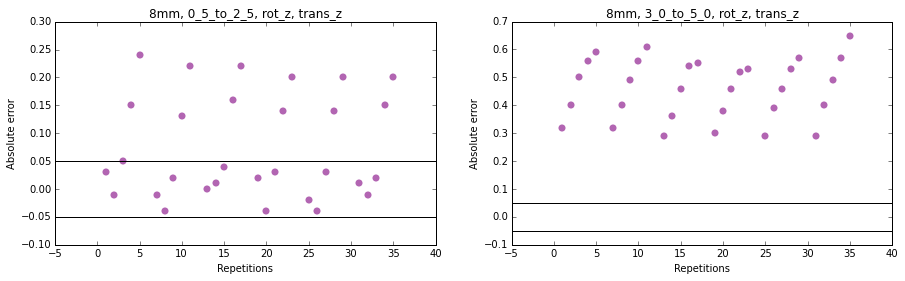

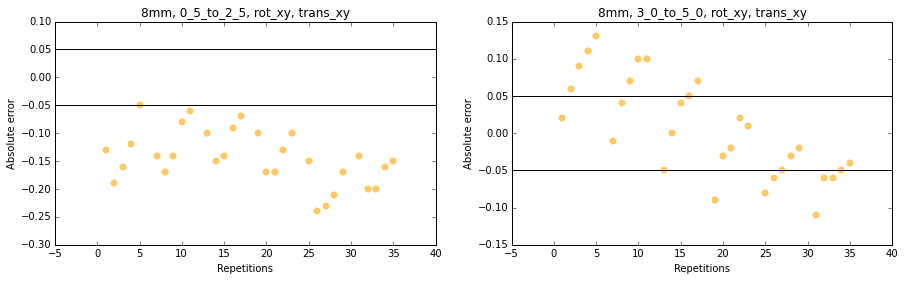

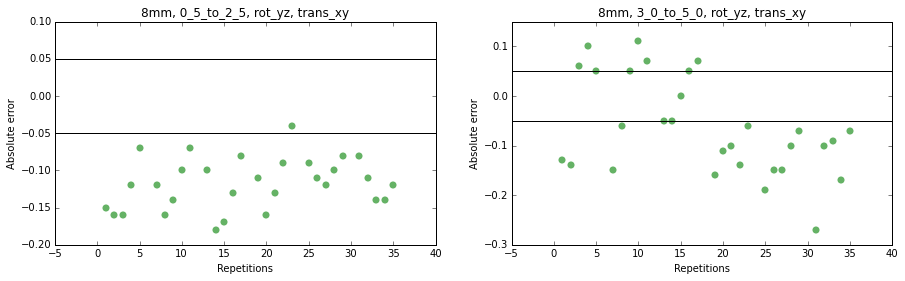

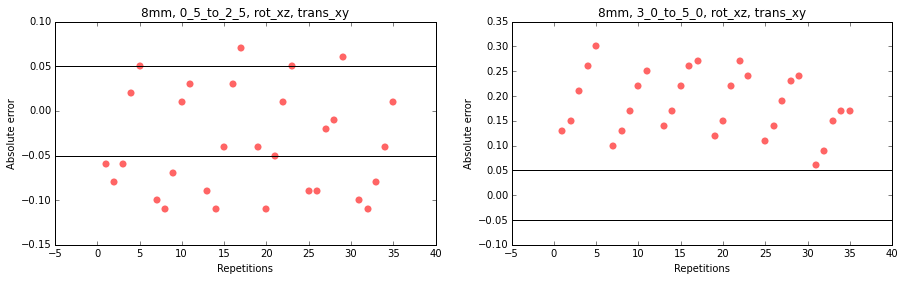

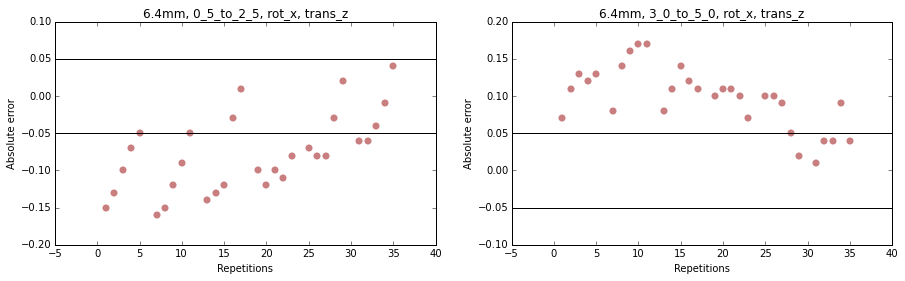

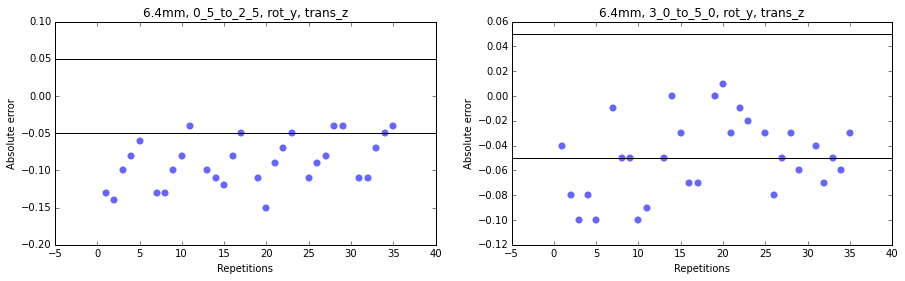

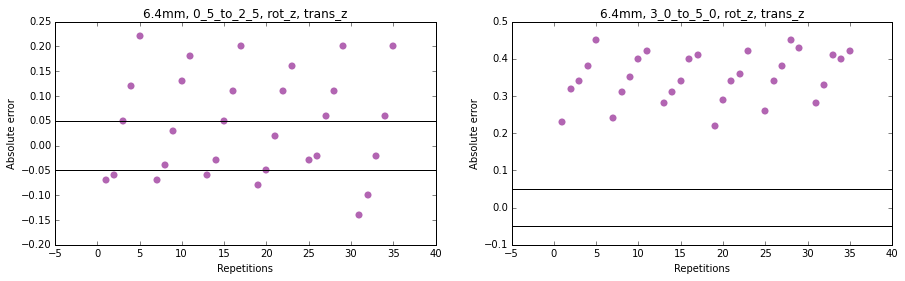

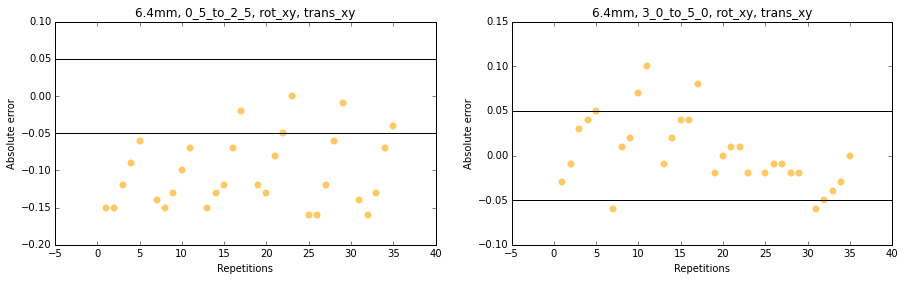

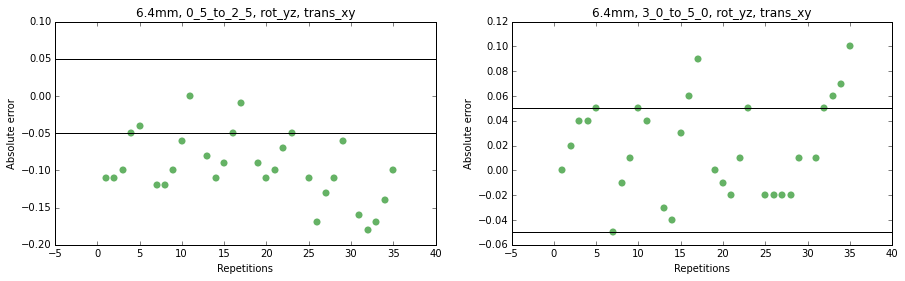

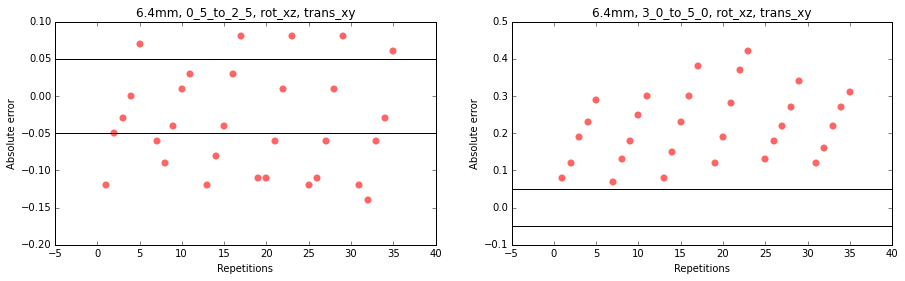

In [15]:
# Error in time for tricubic interpolation
error_in_time(cost_dict_10,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_10_1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

error_in_time(cost_dict_8,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_8_1,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

error_in_time(cost_dict_6_4,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_6_4_1,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

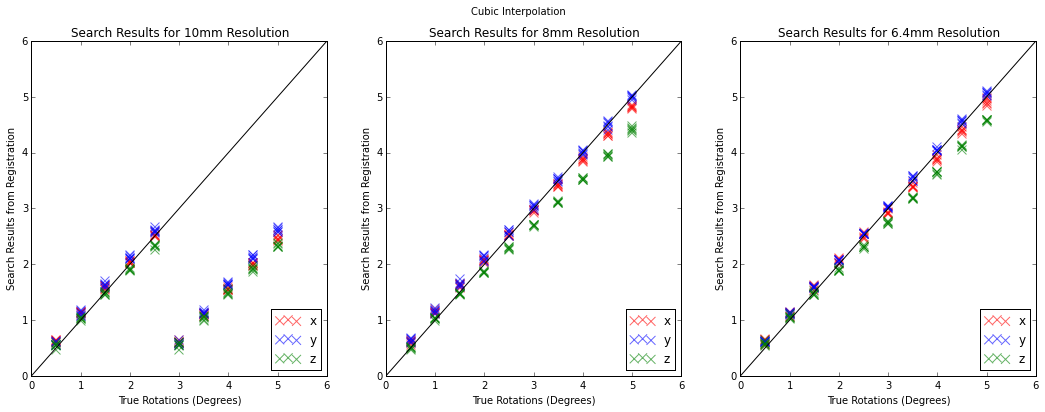

In [16]:
# Bicubic on single axis
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cubic_10_rotation.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cubic_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cubic_6_4_rotation.p','rb'))

# Scatter Plot
plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot(cost_dict_10,'10mm')
plt.subplot(1,3,2)
scatter_plot(cost_dict_8,'8mm')
plt.subplot(1,3,3)
scatter_plot(cost_dict_6_4,'6.4mm')
plt.suptitle('Cubic Interpolation')
plt.show()

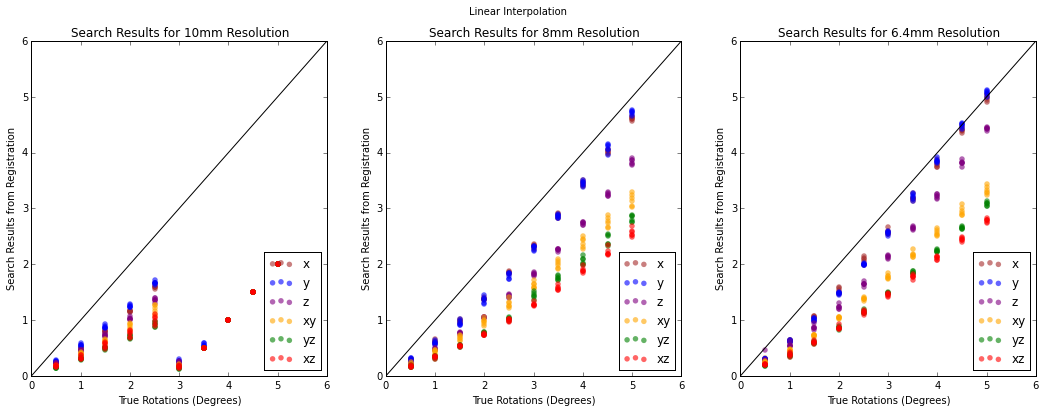

In [20]:
# Trilinear interpolation results
#10mm
cost_dict_10_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_10_rotation.p','rb'))
# 8mm
cost_dict_8_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_linear_6_4_rotation.p','rb'))

scatter_plot_all_linear(['x','y','z','xy','yz','xz'], cost_dict_10_linear, cost_dict_8_linear, cost_dict_6_4_linear,[18,6])

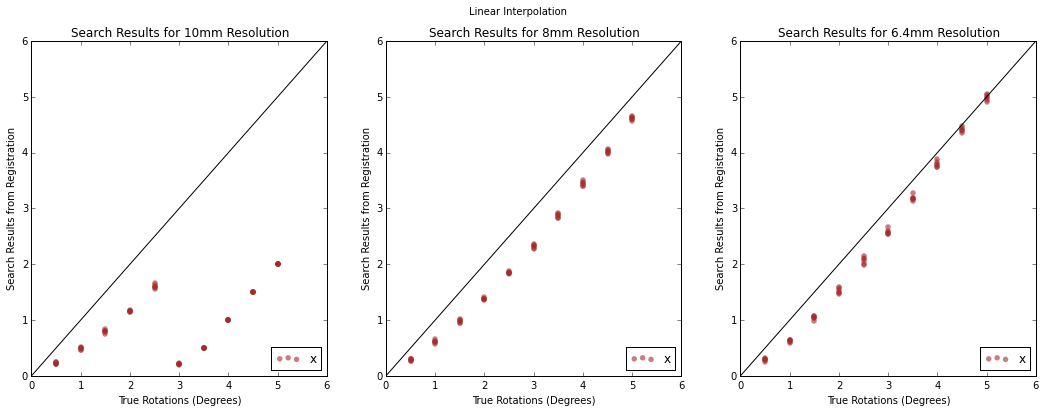

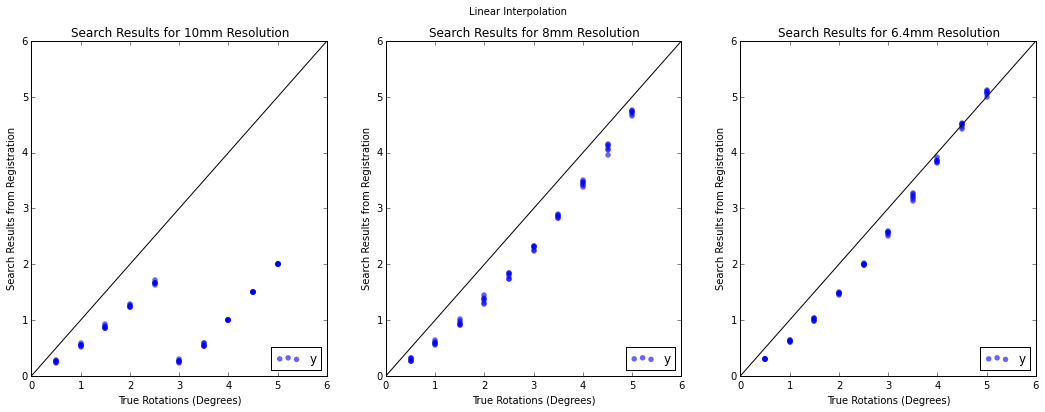

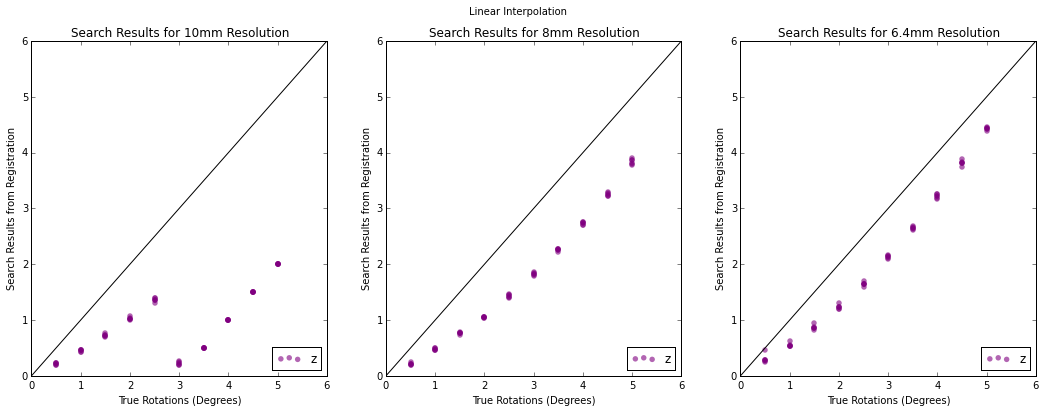

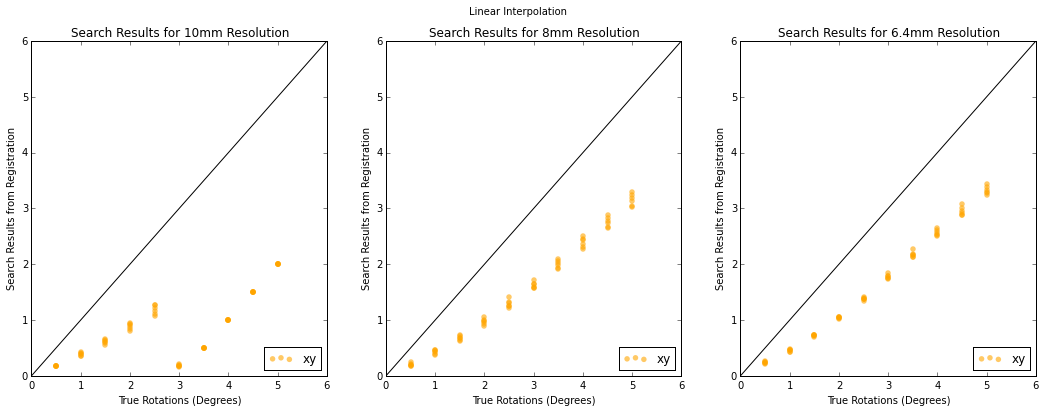

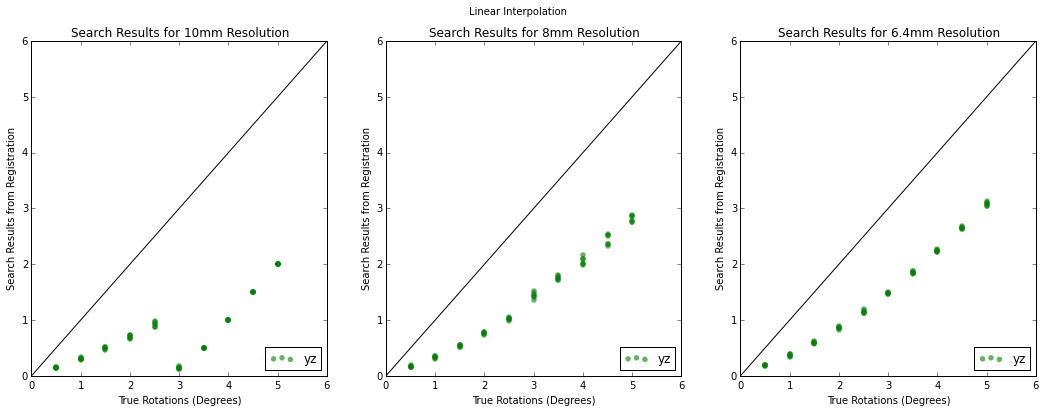

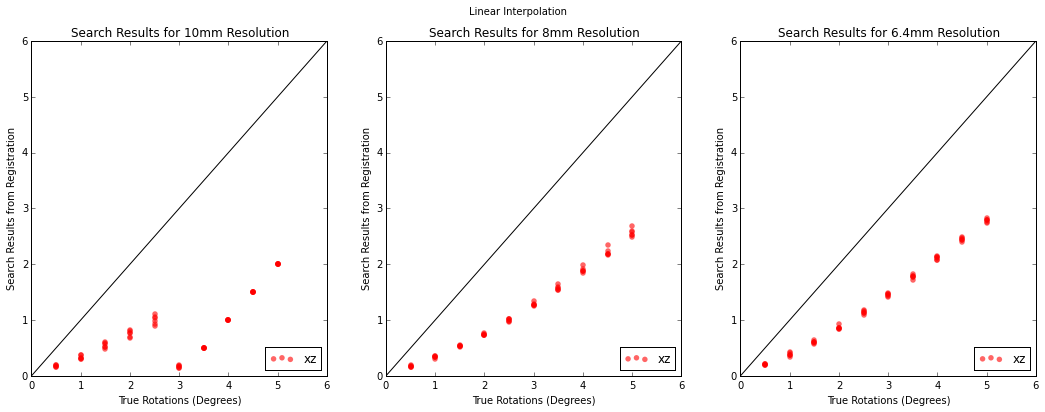

In [27]:
for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_linear(axes, cost_dict_10_linear, cost_dict_8_linear, cost_dict_6_4_linear,[18,6])

# Translations

In [34]:
from sept23_visualize import scatter_plot_all_trans, error_in_time_trans,error_plot_trans

In [35]:
def error_plot_translations(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = [1,2,3,4,5,6]
    labels = ['10mm Cubic','10mm Linear','8mm Cubic','8mm Linear','6.4mm Cubic','6.4mm Linear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='vertical')
    for rot_ax in axes_dict.keys():
        plt.scatter(-5, -5, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    error_plot_trans(cost_dict_10_trans,1,'10mm')
    error_plot_trans(cost_dict_10_trans_linear,2,'10mm')
    error_plot_trans(cost_dict_8_trans,3,'8mm')
    error_plot_trans(cost_dict_8_trans_linear,4,'8mm')
    error_plot_trans(cost_dict_6_4_trans,5,'6.4mm')
    error_plot_trans(cost_dict_6_4_trans_linear,6,'6.4mm')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

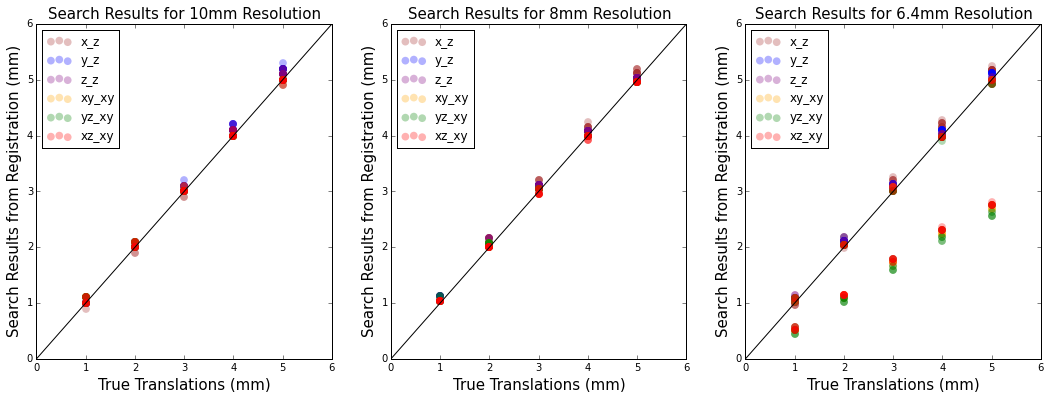

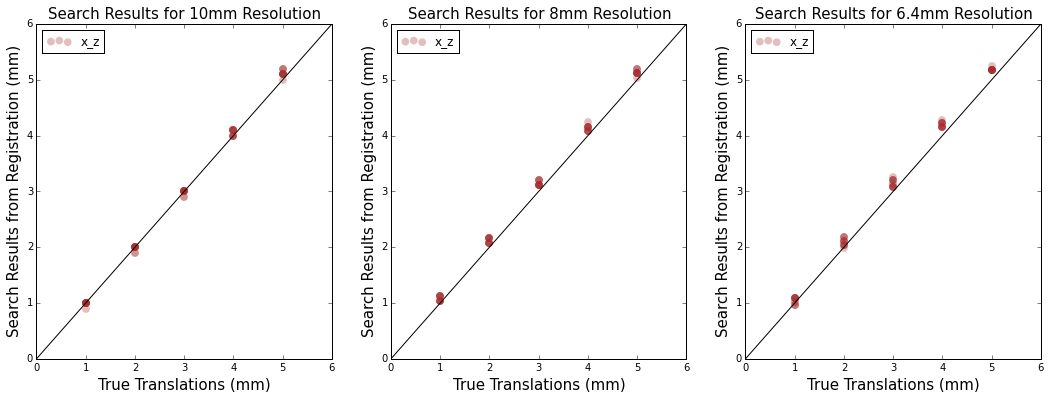

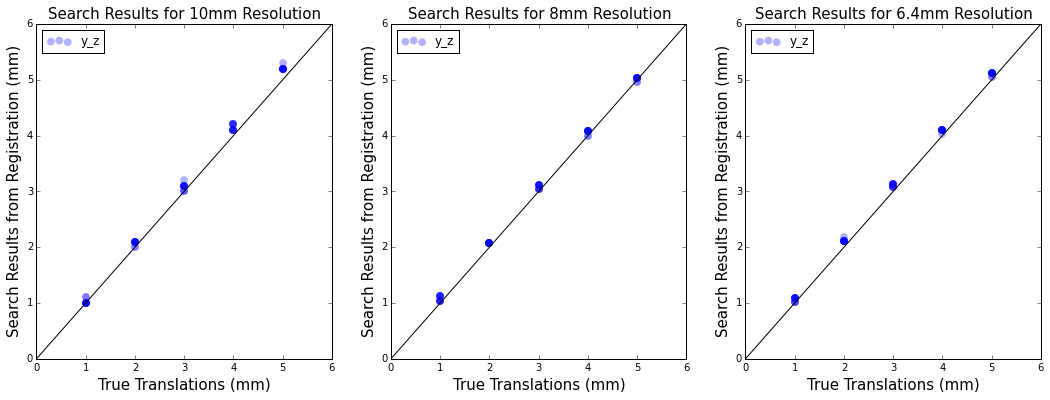

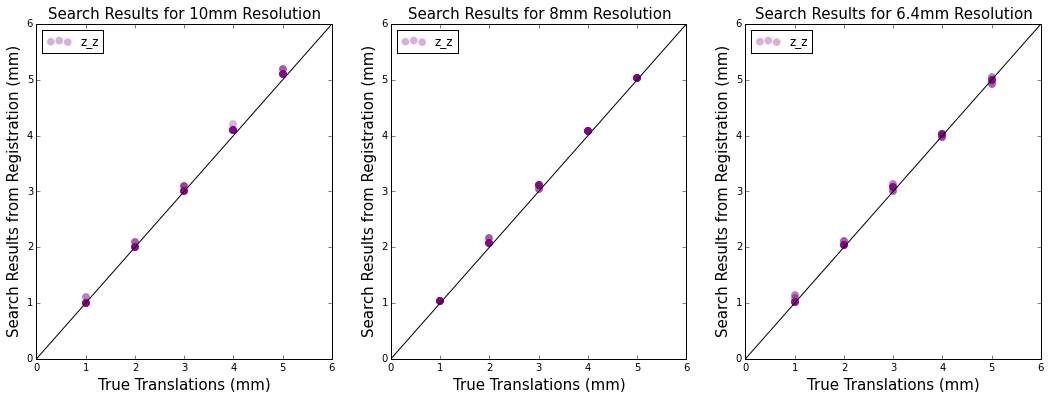

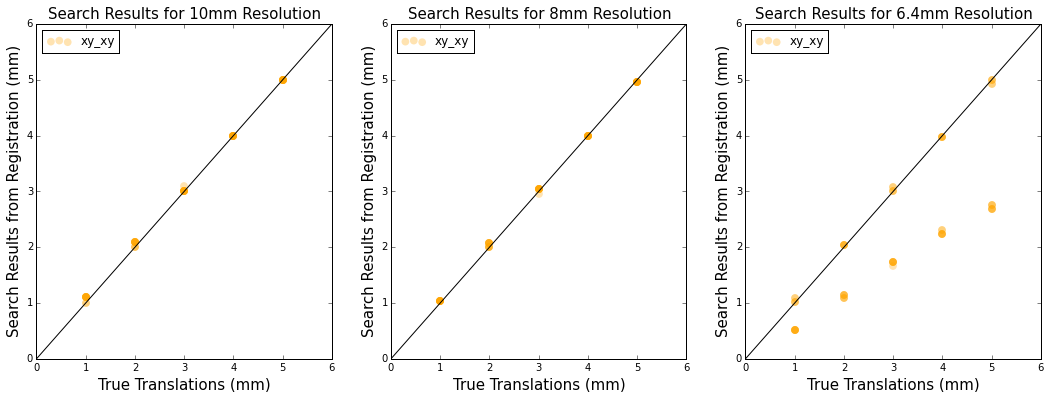

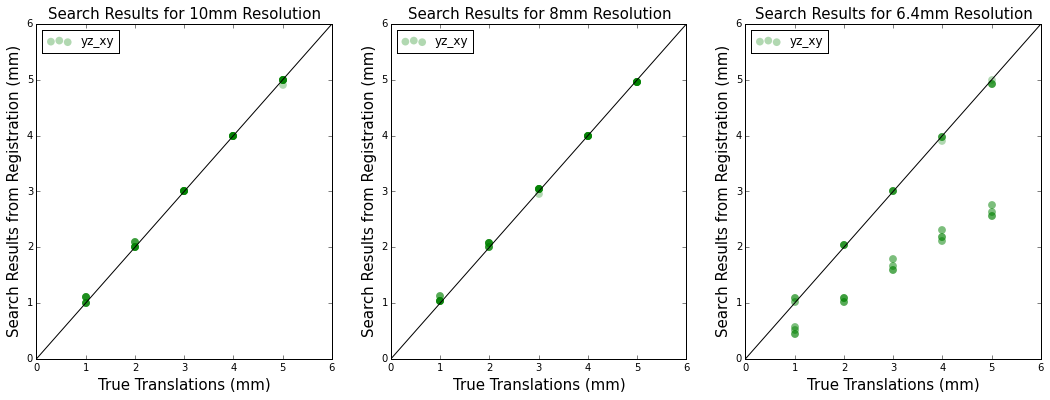

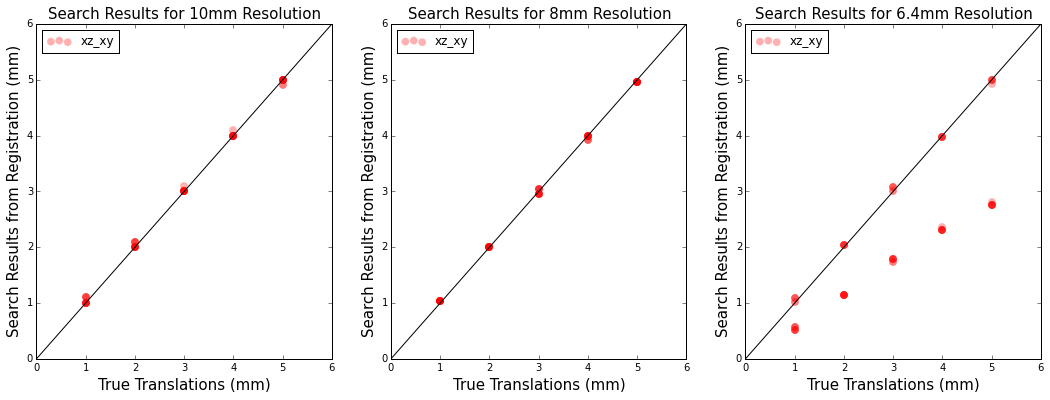

In [39]:
# Cubic With Mask
#10mm
cost_dict_10_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order3_10_masked.p','rb'))
# 8mm
cost_dict_8_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order3_8_masked.p','rb'))
#6.4mm
cost_dict_6_4_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order3_6_4_masked.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10_trans, cost_dict_8_trans, cost_dict_6_4_trans, [18,6],interp = 'Cubic')

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10_trans, cost_dict_8_trans, cost_dict_6_4_trans, [18,6],interp='Cubic')

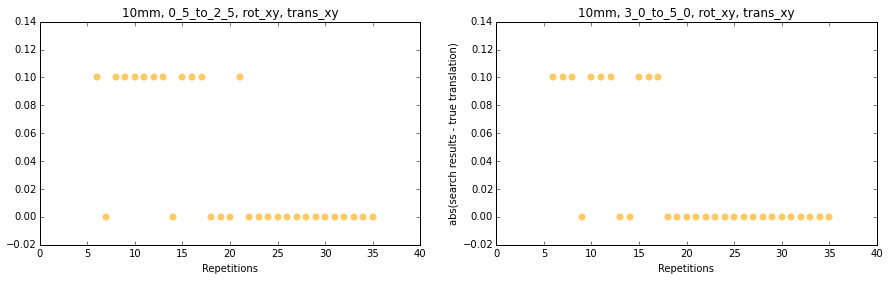

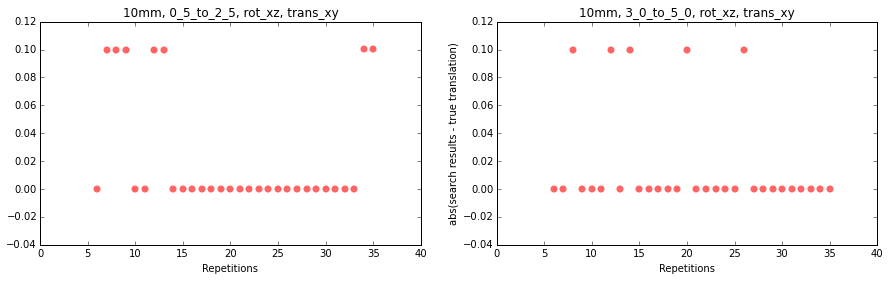

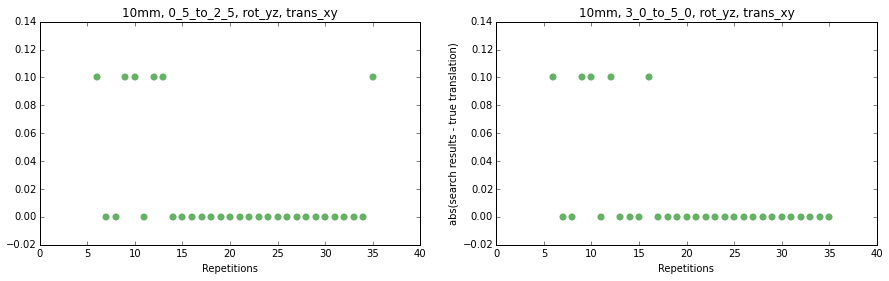

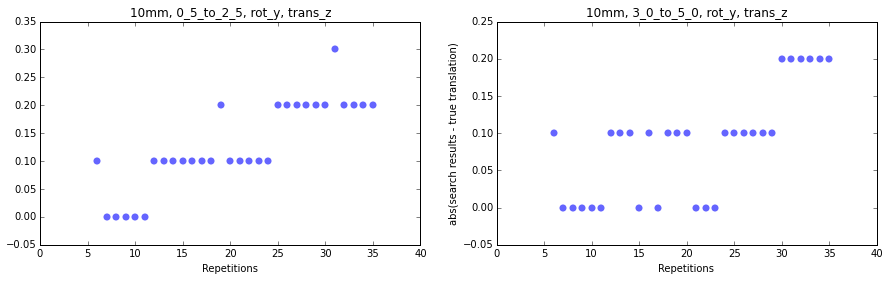

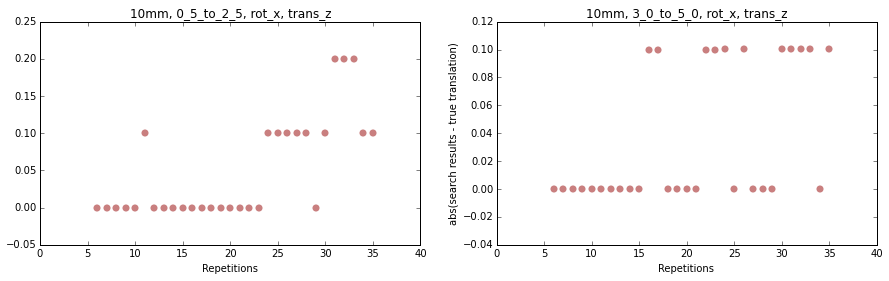

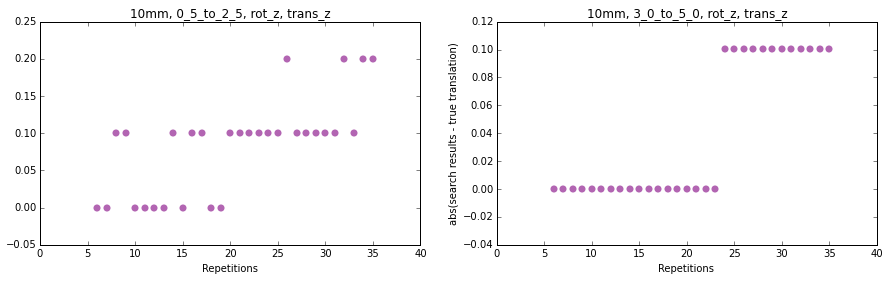

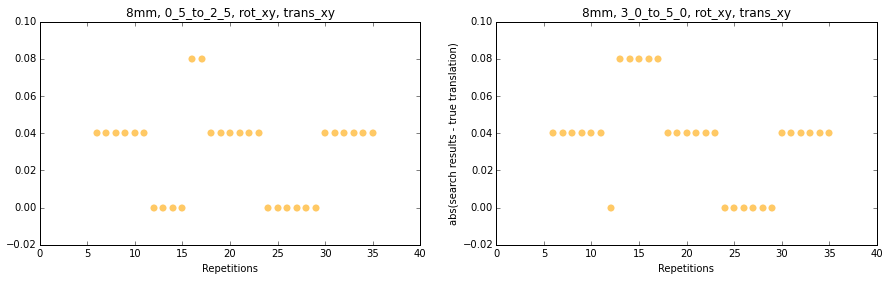

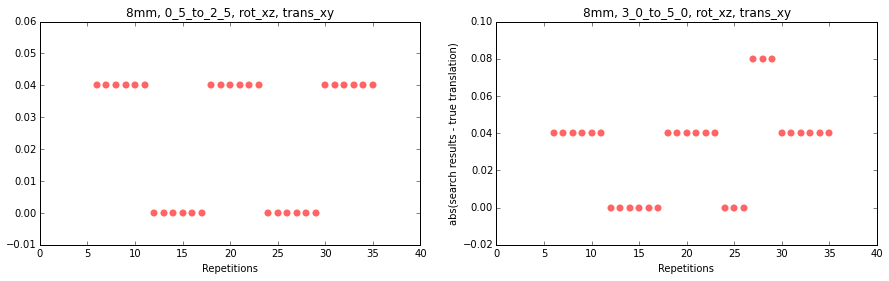

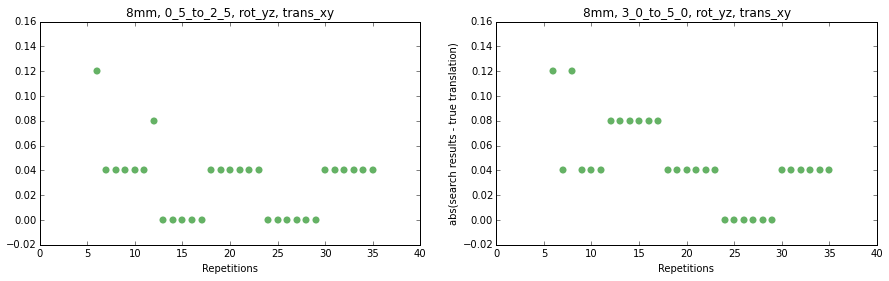

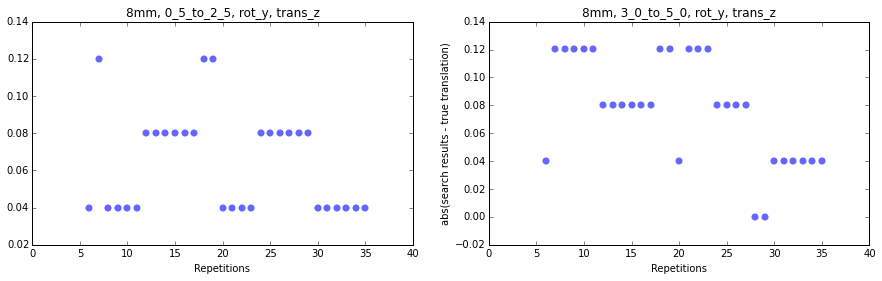

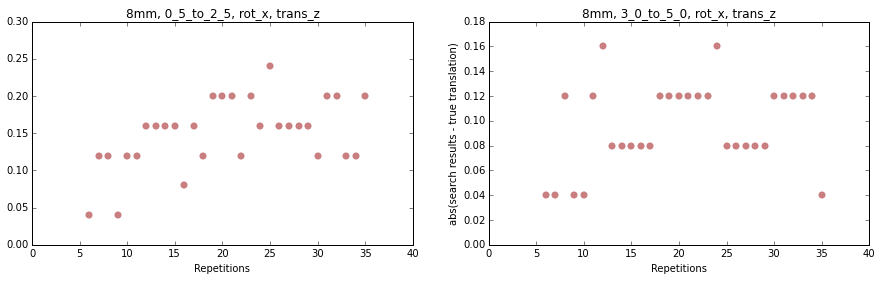

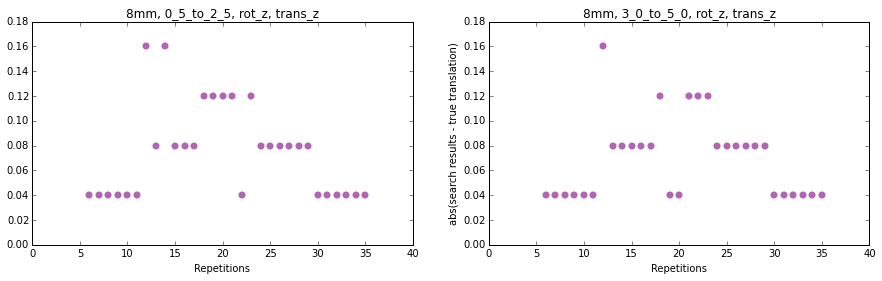

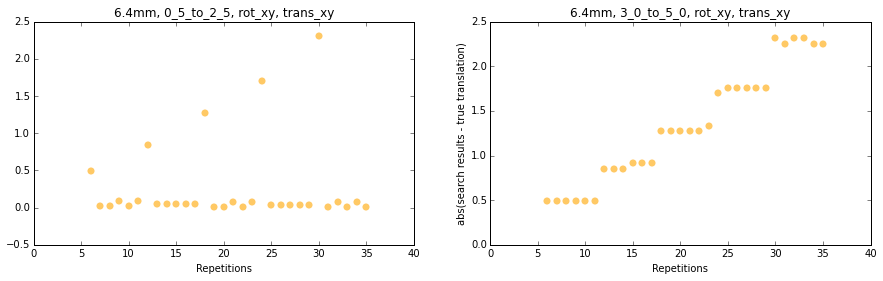

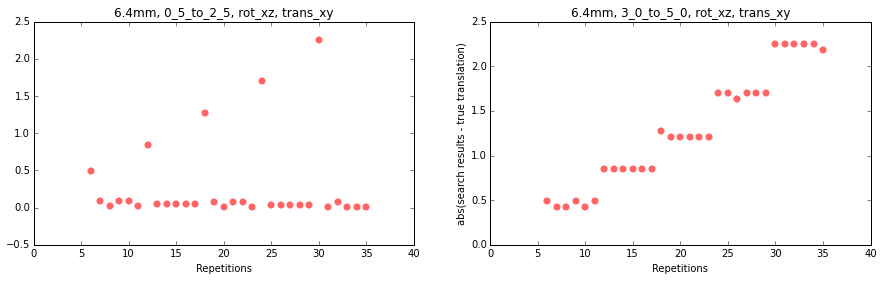

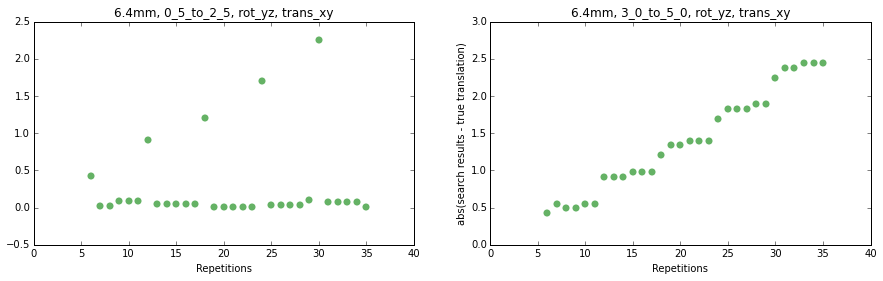

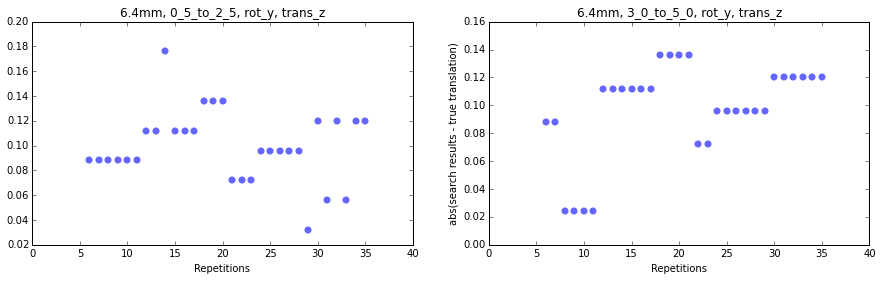

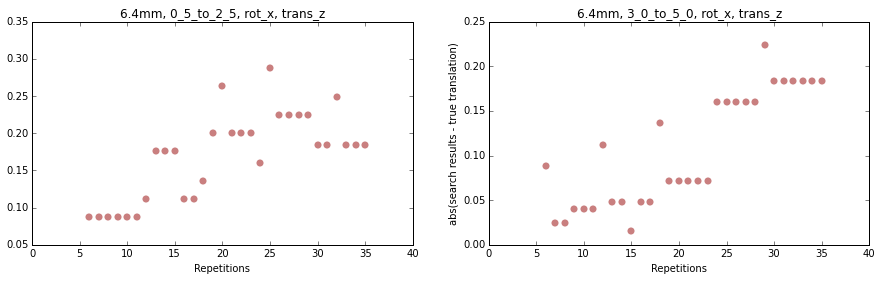

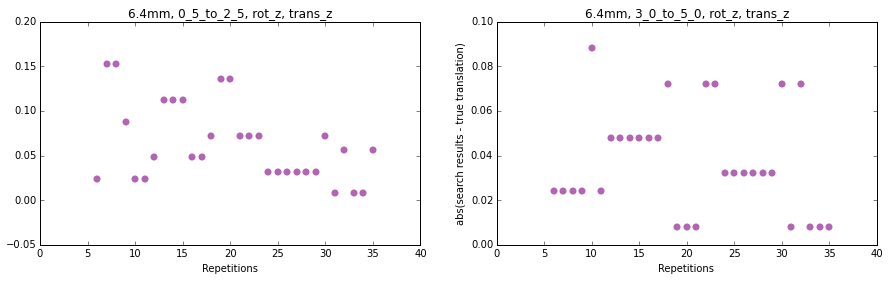

In [21]:
# Cubic With Maskk, Errors
error_in_time_trans(cost_dict_10_trans,'10mm')
error_in_time_trans(cost_dict_8_trans,'8mm')
error_in_time_trans(cost_dict_6_4_trans,'6.4mm')

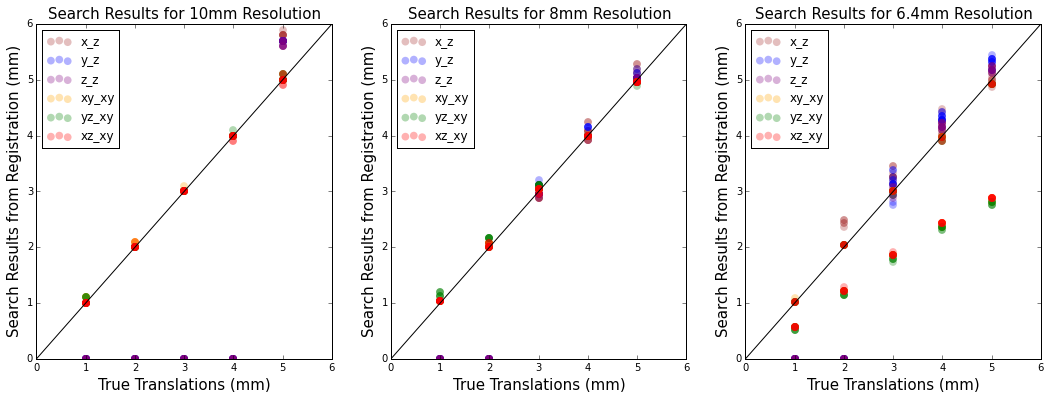

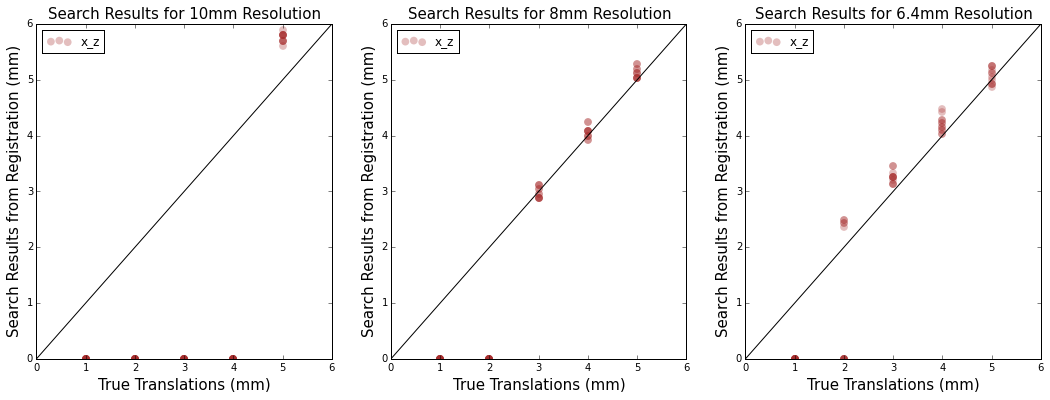

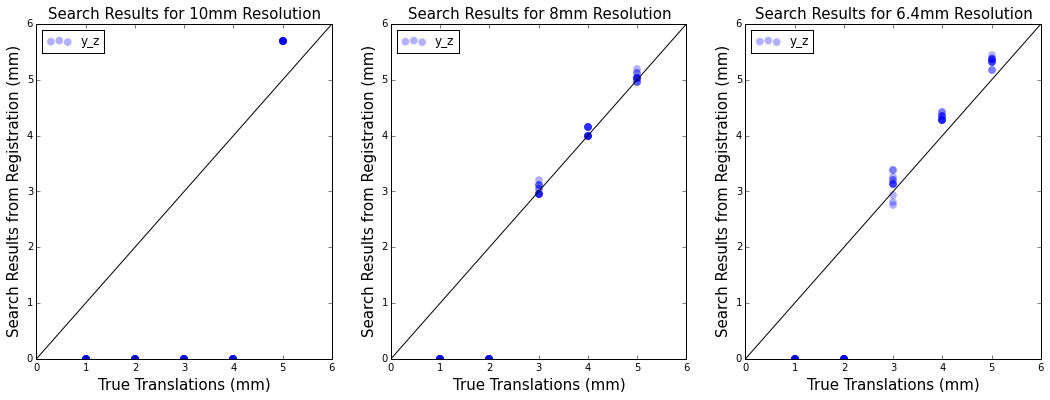

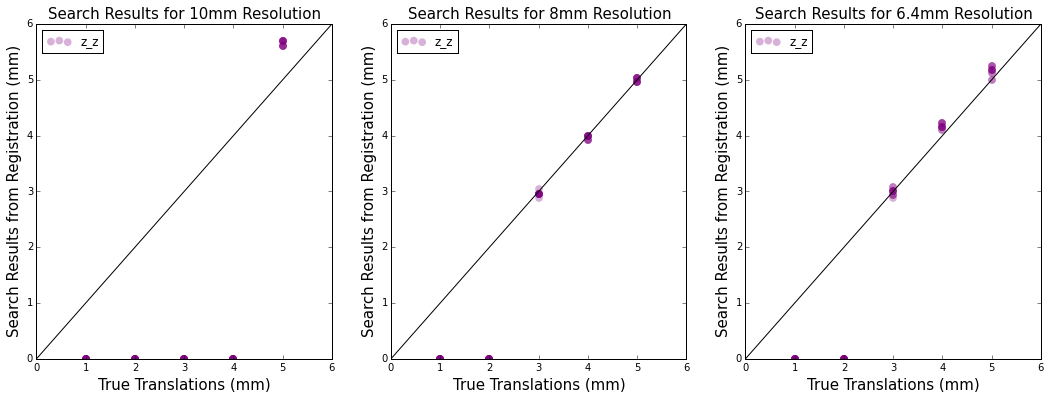

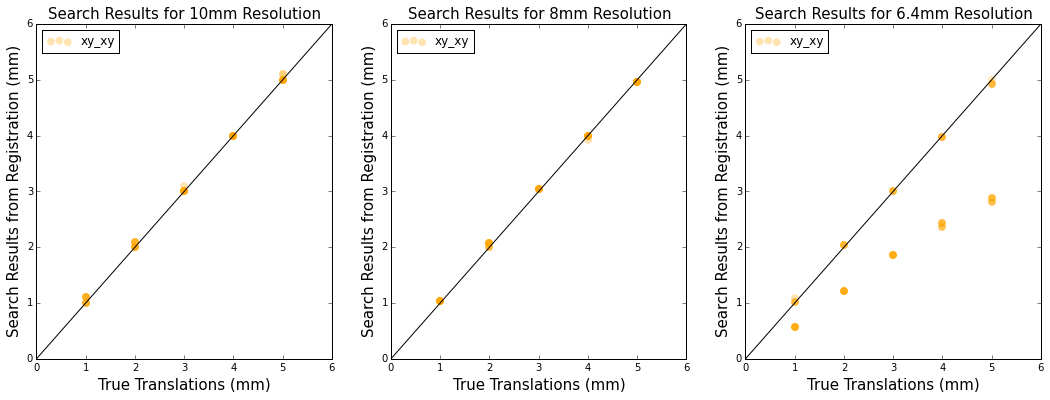

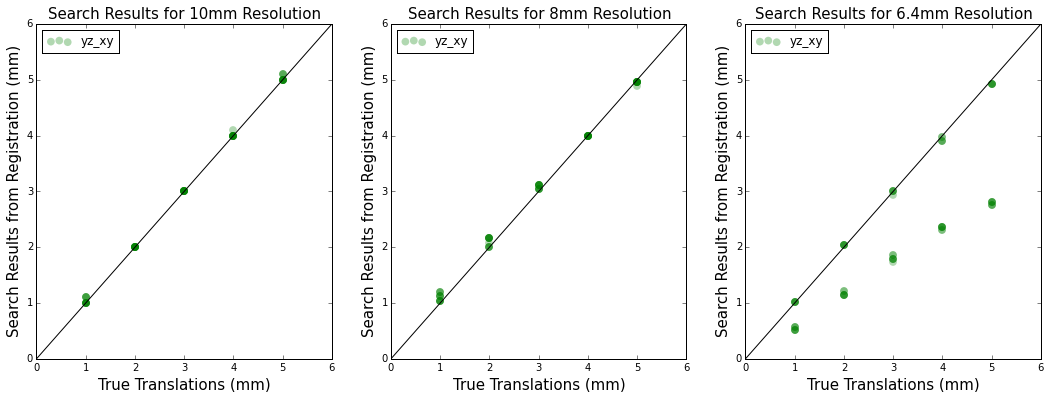

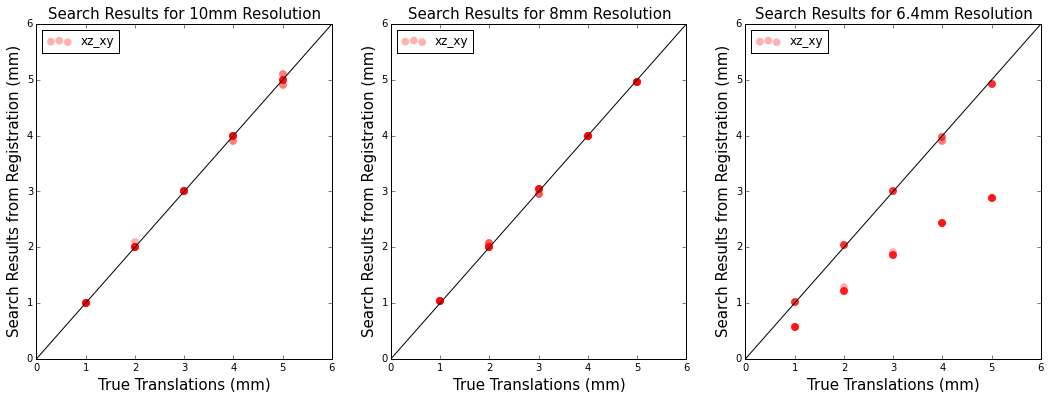

In [40]:
# Cubic No Mask
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear3_10_.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear3_8_.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear3_6_4_.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6],interp = 'Cubic')

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6],interp='Cubic')

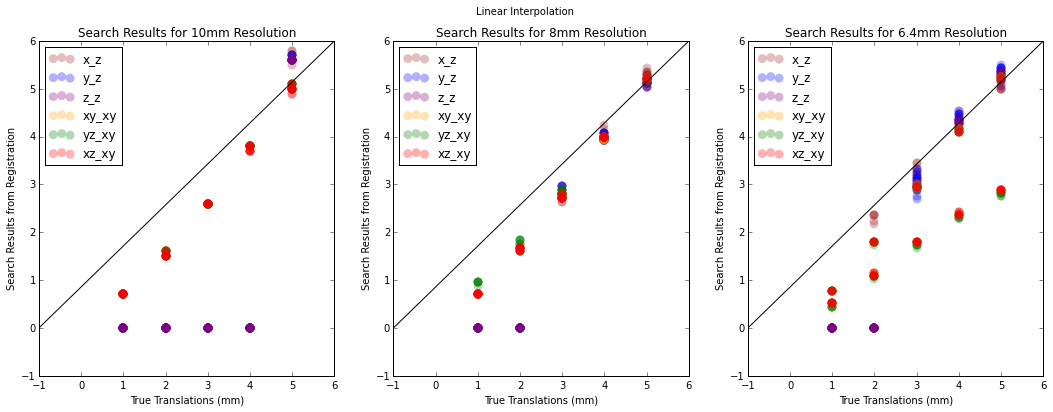

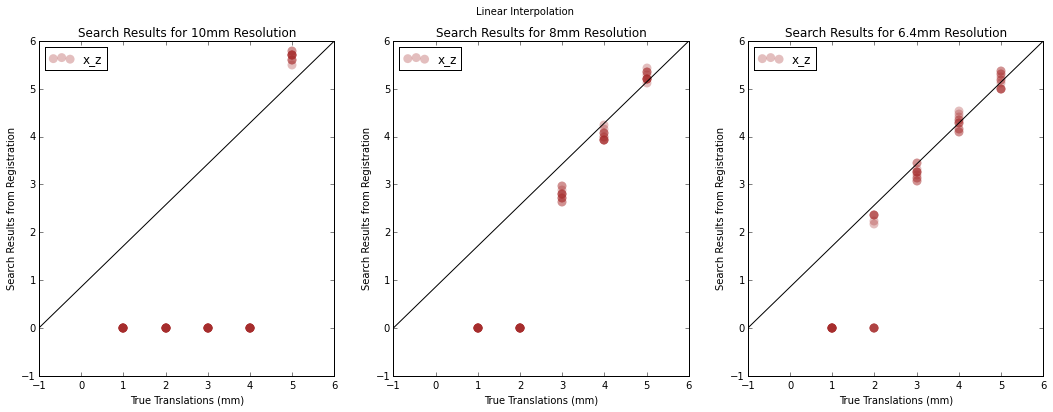

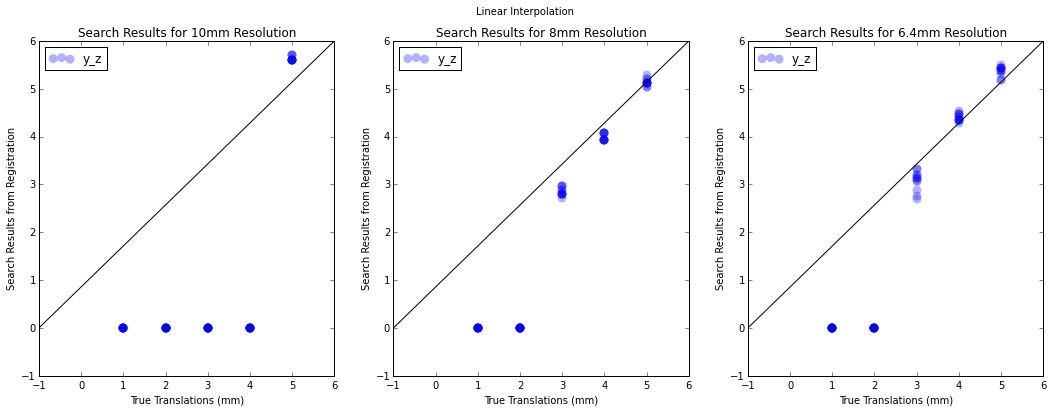

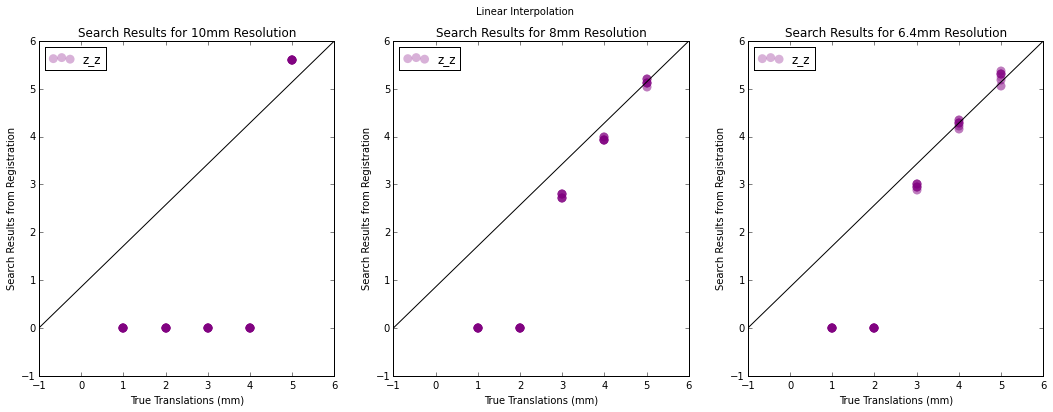

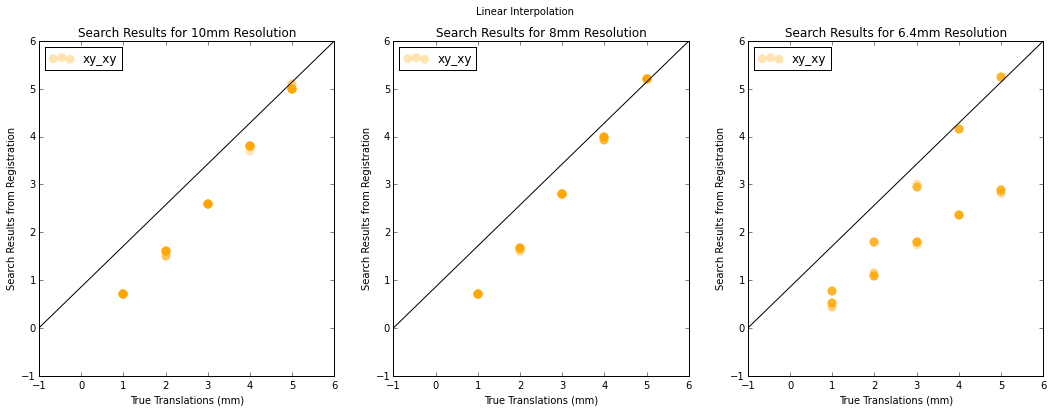

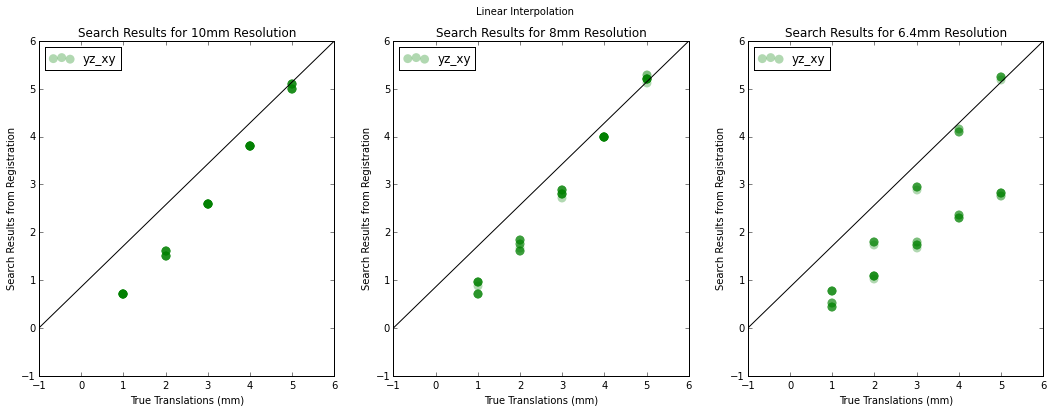

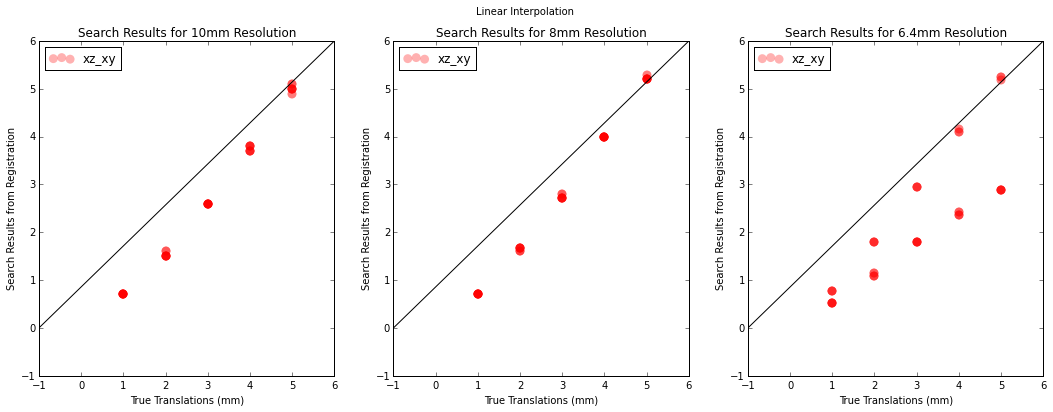

In [49]:
# Linear No Mask
#10mm
cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_10_.p','rb'))
# 8mm
cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_8_.p','rb'))
#6.4mm
cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_6_4_.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6])

for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_trans(axes, cost_dict_10, cost_dict_8, cost_dict_6_4, [18,6])

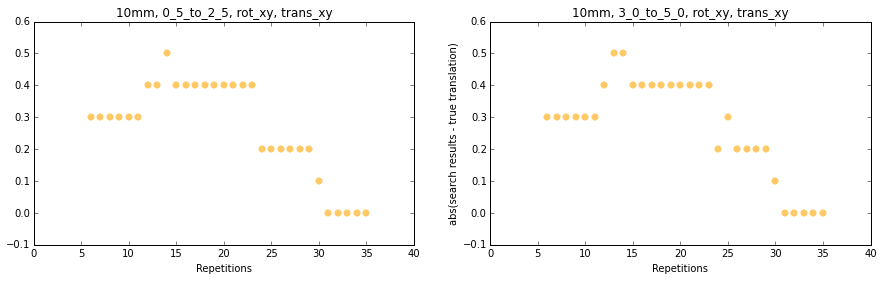

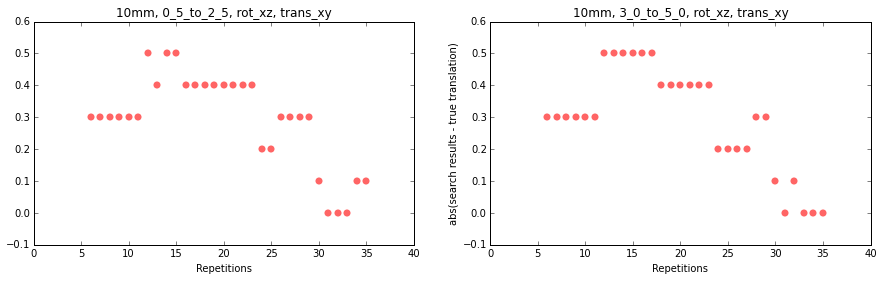

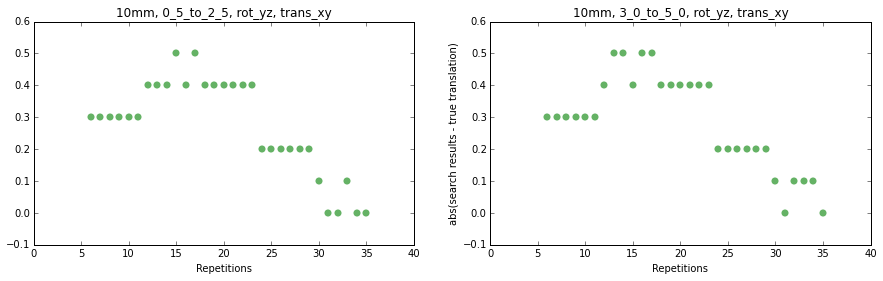

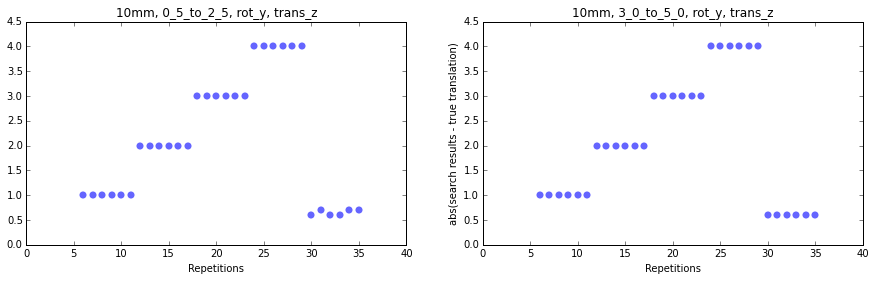

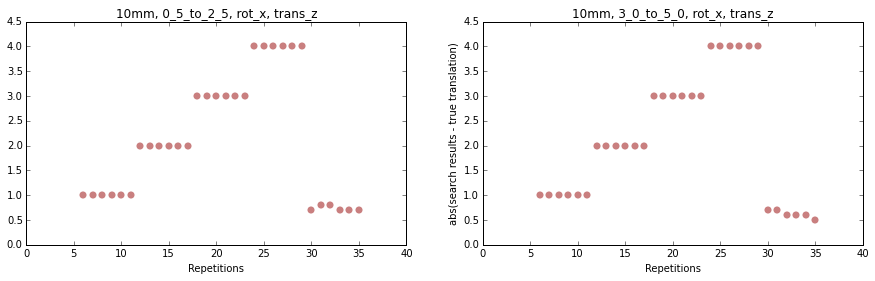

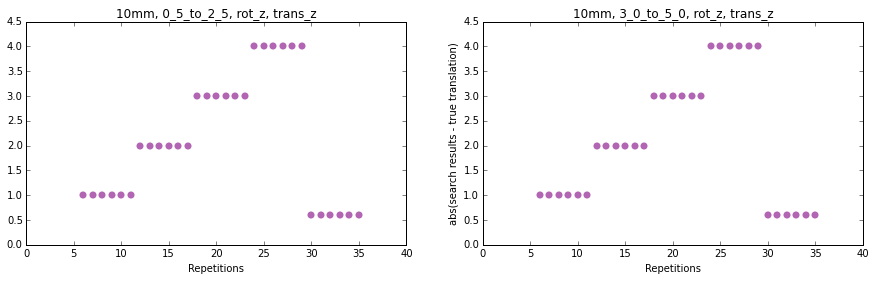

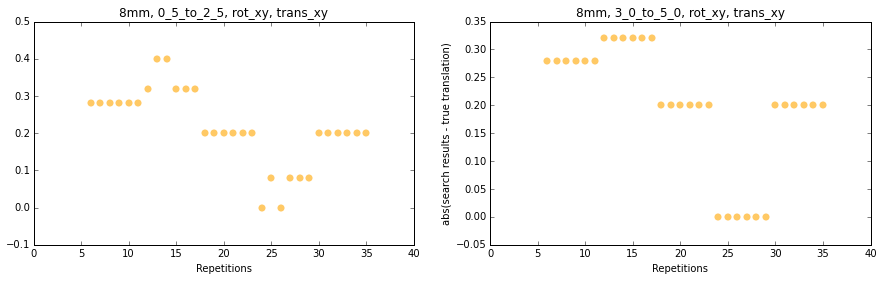

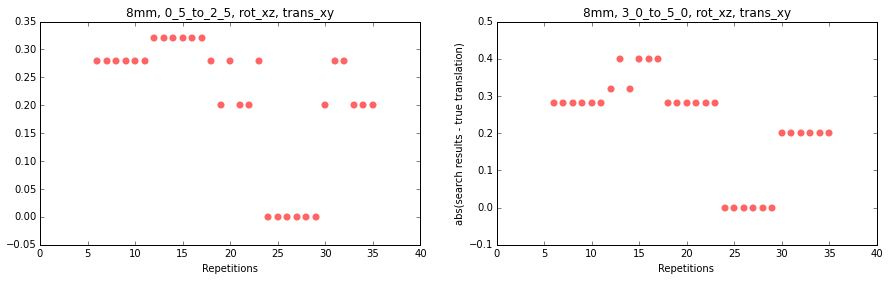

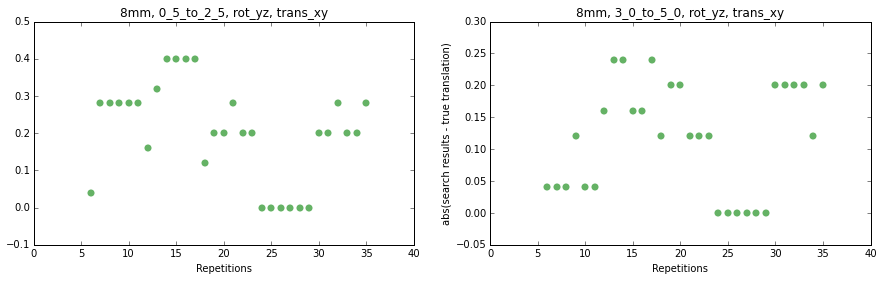

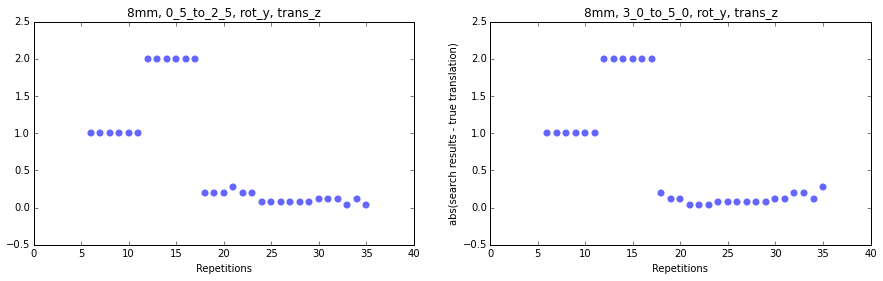

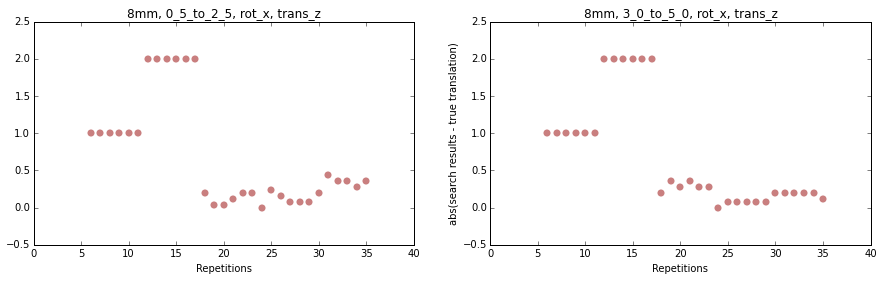

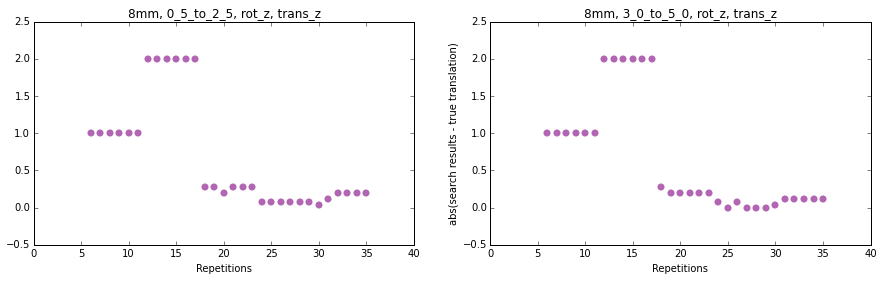

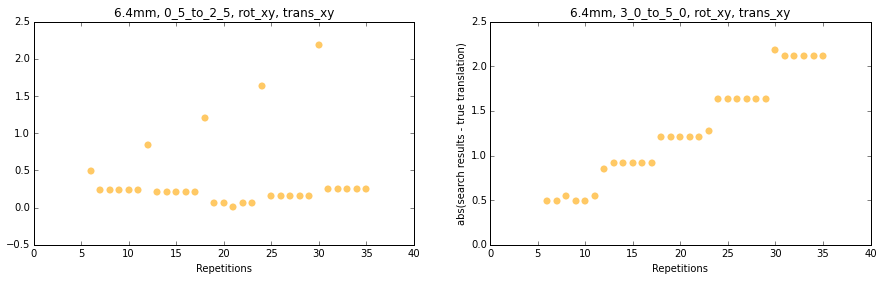

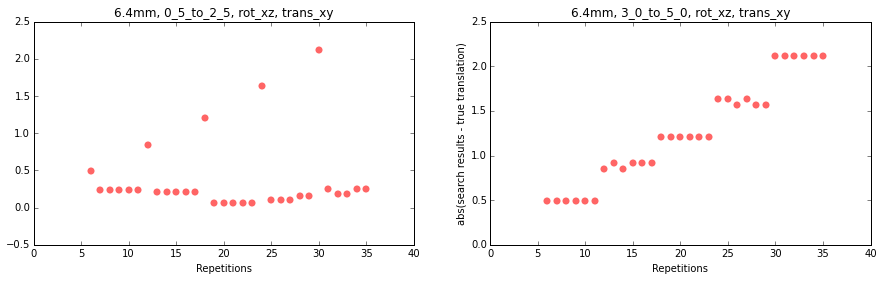

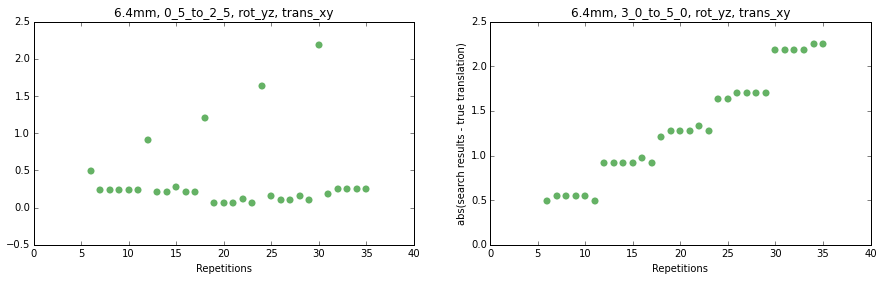

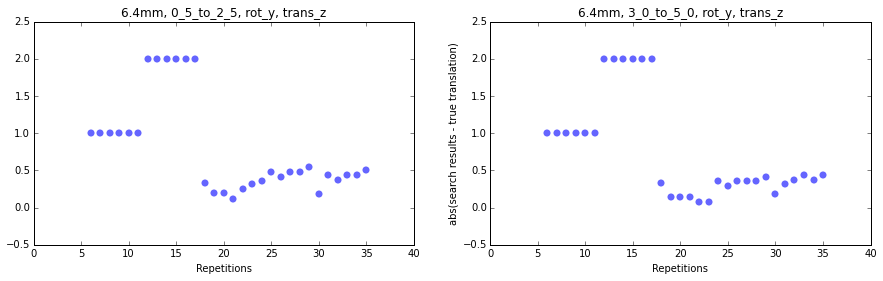

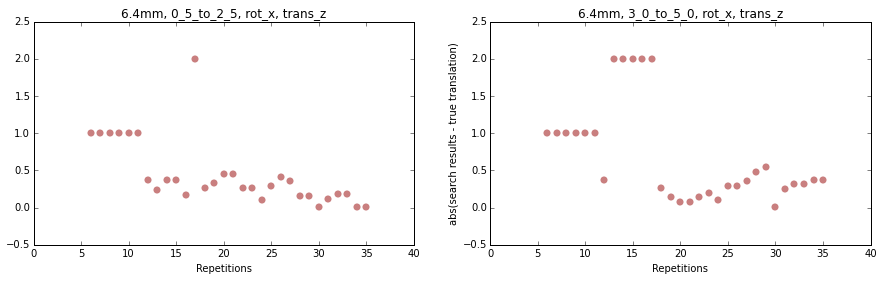

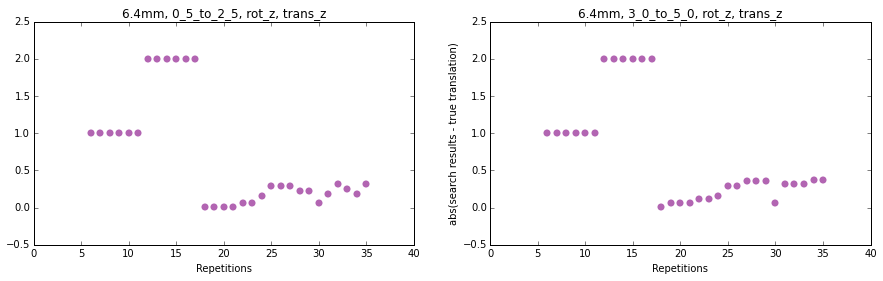

In [50]:
# Linear No Mask, Errors
error_in_time_trans(cost_dict_10,'10mm')
error_in_time_trans(cost_dict_8,'8mm')
error_in_time_trans(cost_dict_6_4,'6.4mm')

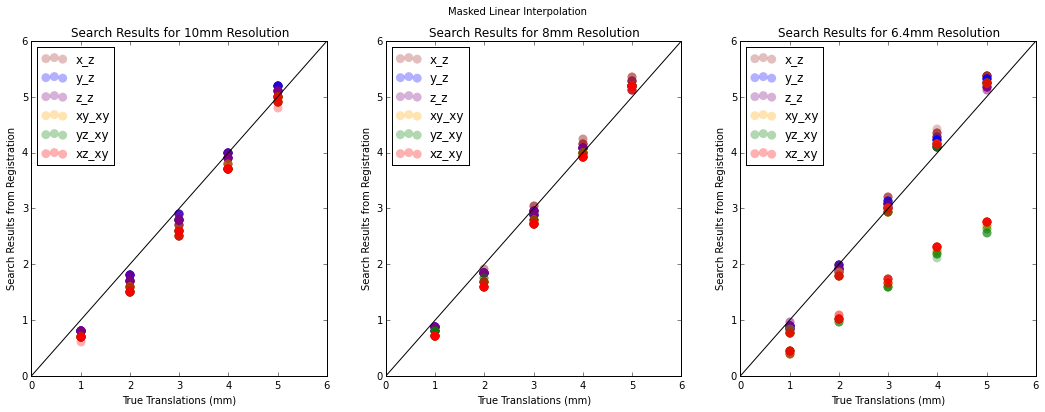

In [64]:
# Linear With Mask
#10mm
cost_dict_10_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_10_masked.p','rb'))
# 8mm
cost_dict_8_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/cost_trans_linear1_8_masked.p','rb'))
#6.4mm
cost_dict_6_4_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/sept23_cost_trans_order1_6_4_masked.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10_trans_linear, 
                       cost_dict_8_trans_linear, cost_dict_6_4_trans_linear, 
                       [18,6], interp = 'Masked Linear')

# for ax in ['x','y','z','xy','yz','xz']:
#     axes = [ax]
#     scatter_plot_all_trans(axes, cost_dict_10_trans_linear, cost_dict_8_trans_linear, cost_dict_6_4_trans_linear, [18,6])

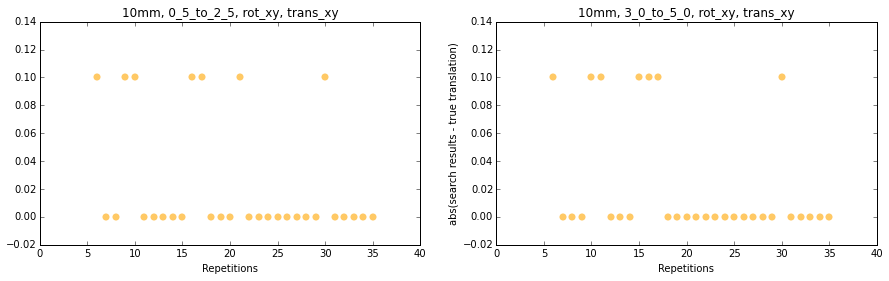

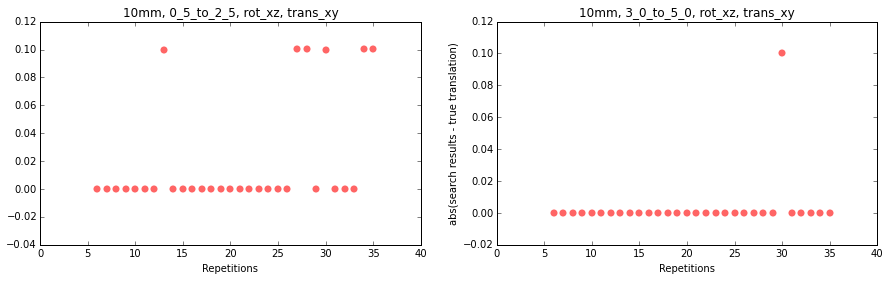

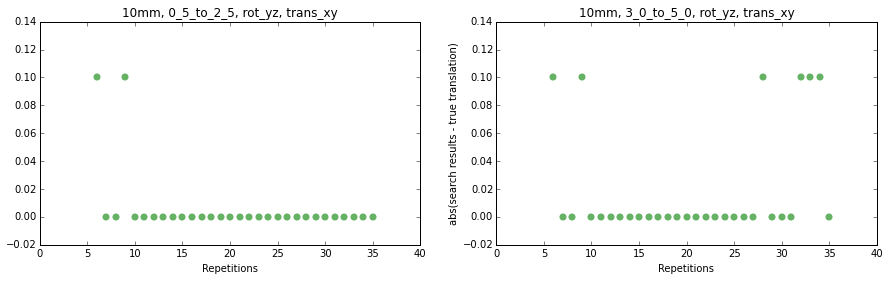

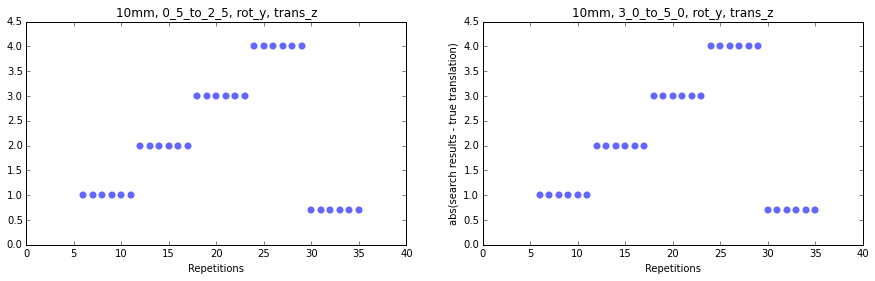

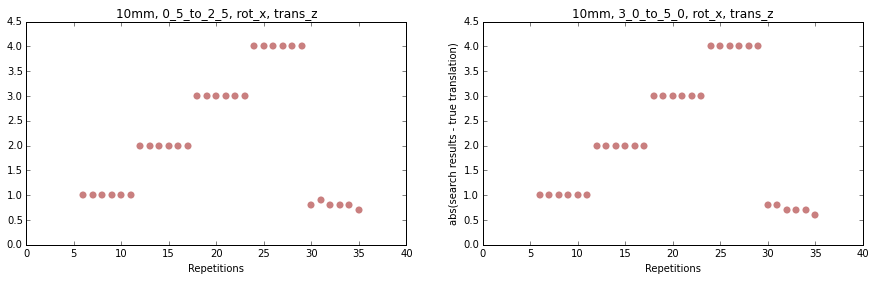

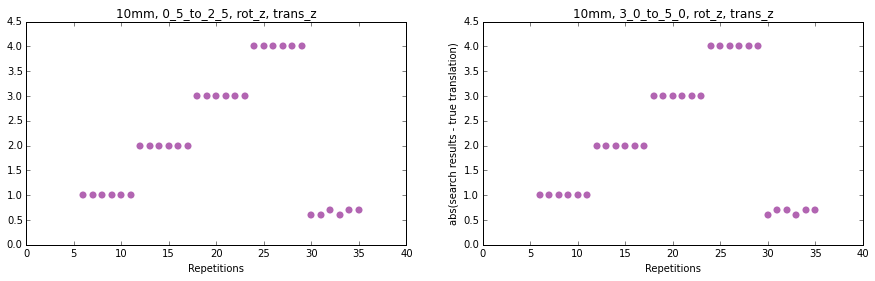

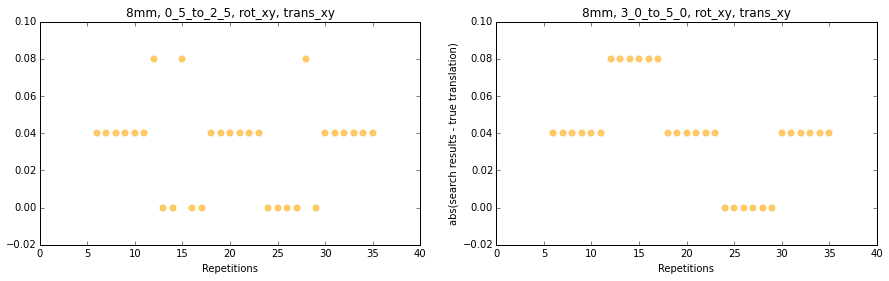

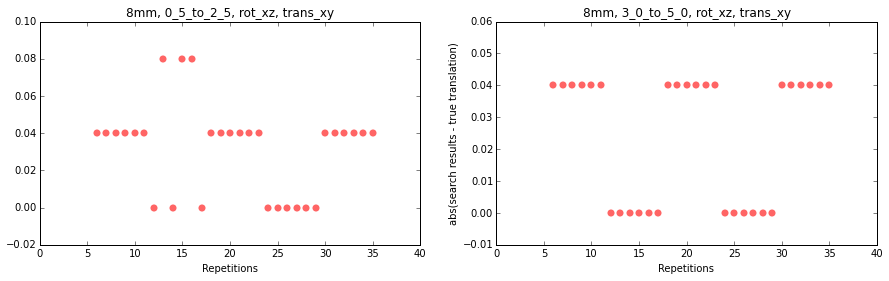

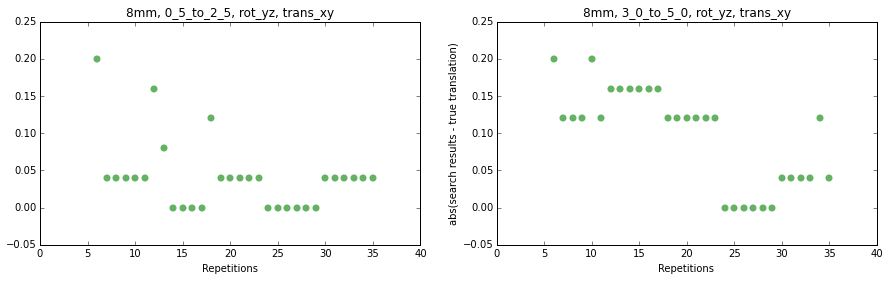

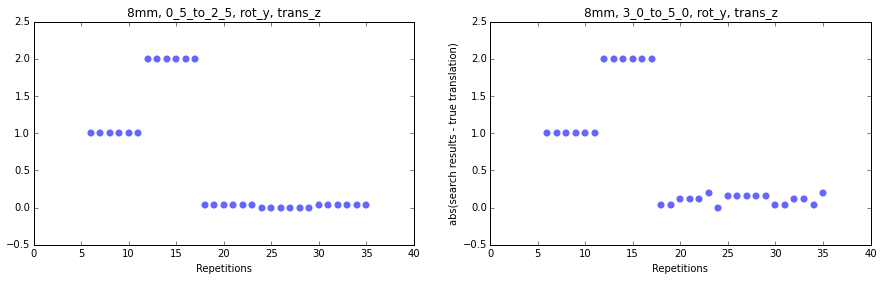

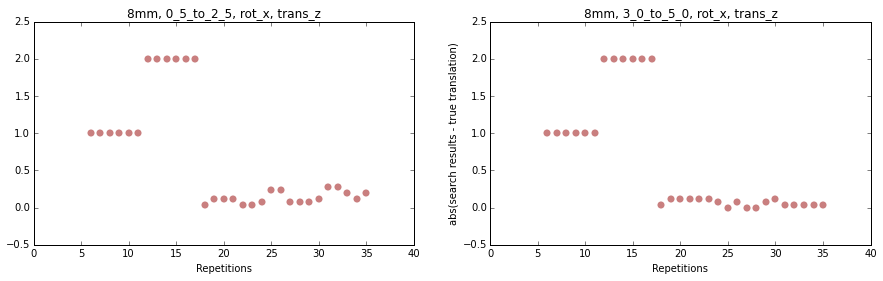

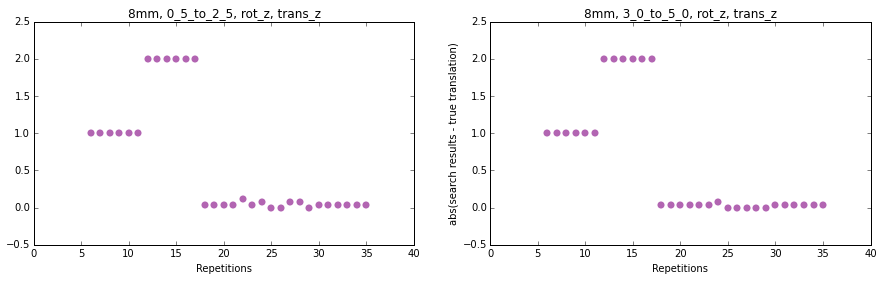

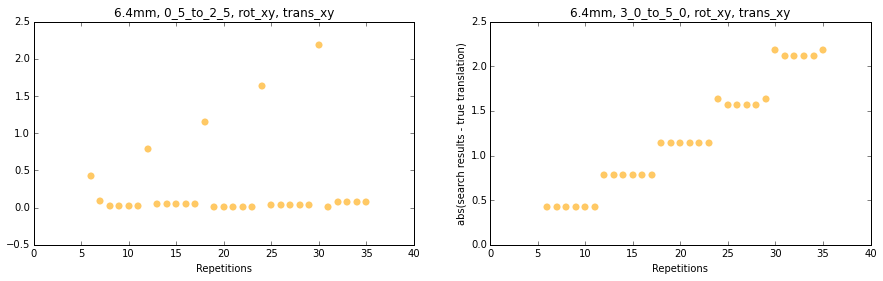

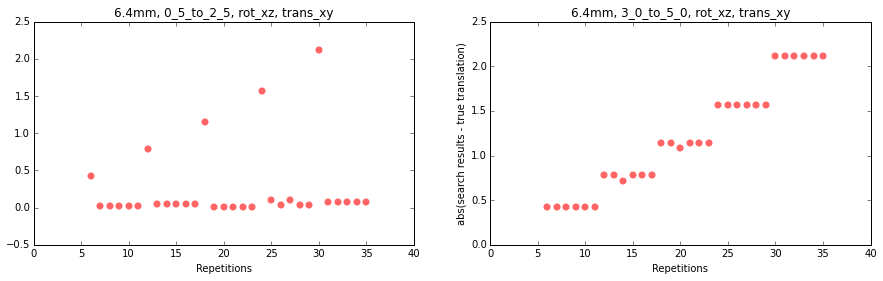

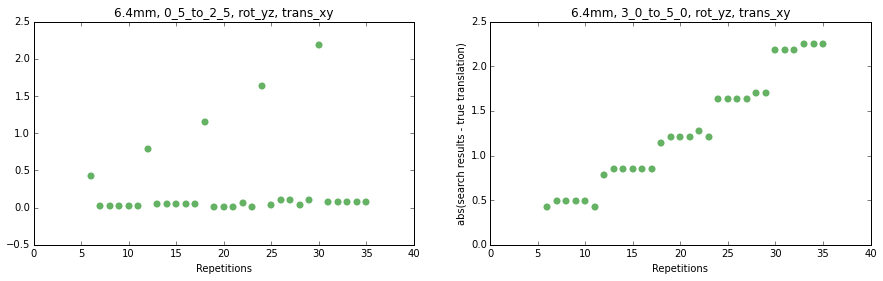

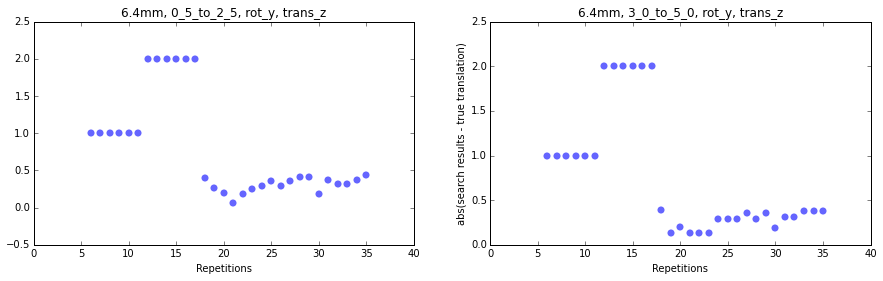

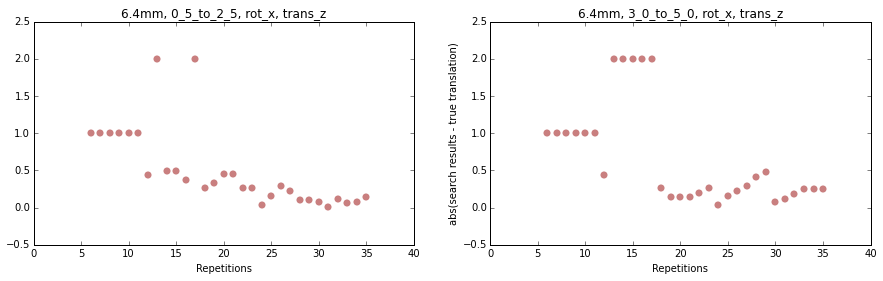

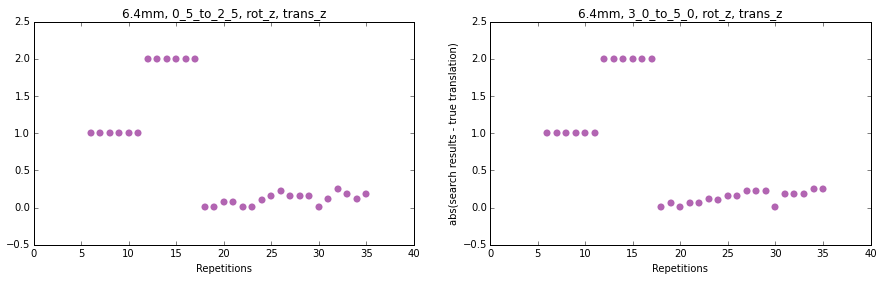

In [17]:
# Cubic No Mask
error_in_time_trans(cost_dict_10,'10mm')
error_in_time_trans(cost_dict_8,'8mm')
error_in_time_trans(cost_dict_6_4,'6.4mm')

In [ ]:
# # Tricubic Interpolation Results
# cost_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_tricubic_10_rotation_01.p','rb'))
# #cost_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_tricubic_8_rotation_01.p','rb'))
# cost_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_tricubic_6_4_rotation_01.p','rb'))
# plt.figure(figsize = [18,6])
# plt.subplot(1,3,1)
# scatter_plot_cubic(cost_dict_10, '10mm', axes_dict.keys(),0.1)
# #plt.subplot(1,3,2)
# #scatter_plot_cubic(cost_dict_8, '8mm', axes_dict.keys(),0.1)
# plt.subplot(1,3,3)
# scatter_plot_cubic(cost_dict_6_4, '6.4mm', axes_dict.keys(),0.1)
# plt.show()